# Assignment 2

Name - Shweta Chandraprakash Bulchandani

NUID - 002769540

# Abstarct

The goal was to construct a realistic model to precisely predict the next meningitis disease outbreak in Nigeria. It is generally believed that it’s impossible to precisely predict the next meningitis disease as it depends on various factors. For this dataset age and report year is the dependent variable and others are independent variables. First, major factors affecting the diseases should be selected. Then, a model for disease prediction should be established from linear regression. That should be applied to the Meningitis dataset to test the model. Through the data analysis and test it can be summarized that the linear regression model can effectively predict and analyze the housing price to some extent, while the algorithm can still be improved through more advanced machine learning methods.

# Information about the Dataset

What is our ultimate aim with this notebook?

Our ultimate aim is to build a machine learning model that can predict if the person will be afflicted with meningitis disease based on certain parameters. Before we create a model we need to do some data cleaning, feature selection and exploratory data analysis of the kaggle dataset.

**Kaggle Dataset Link**: https://www.kaggle.com/datasets/eiodelami/disease-outbreaks-in-nigeria-datasets

# Installing Dependencies 

In [8]:
##Installing dependencies
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 6.3 MB/s eta 0:00:00


# Importing required Libraries 

Automated machine learning (AutoML) is the process of automating the end-to-end process of applying machine learning to real-world problems.

H2O AutoML automates the steps like basic data processing, model training and tuning. Ensemble and stacking of various models to provide the models with the best performance so that developers can focus on other steps like data collection, feature engineering and deployment of model.

We are initializing H2O in the following steps.

In [9]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr


import statsmodels.api as sd
from sklearn import tree
import sklearn.metrics as sm
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={"figure.figsize": (16, 8)})

In [10]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [11]:
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


# Initiate H2O

In [12]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)
#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:53210..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7n073tn3
  JVM stdout: /tmp/tmp7n073tn3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp7n073tn3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:53210
Connecting to H2O server at http://127.0.0.1:53210 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_t36j0z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Reading and Studying the data

In [13]:
pandas_df = pd.read_csv("https://raw.githubusercontent.com/ShwetaBulchandani/DataScienceEngineeringMethods_002769540/main/meningitis_dataset.csv")
# Reading CSV file into Pandas DataFrame

In [14]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   id                          284484 non-null  int64 
 1   surname                     284484 non-null  object
 2   firstname                   284484 non-null  object
 3   middlename                  284484 non-null  object
 4   gender                      284484 non-null  object
 5   gender_male                 284484 non-null  int64 
 6   gender_female               284484 non-null  int64 
 7   state                       284484 non-null  object
 8   settlement                  284484 non-null  object
 9   rural_settlement            284484 non-null  int64 
 10  urban_settlement            284484 non-null  int64 
 11  report_date                 284484 non-null  object
 12  report_year                 284484 non-null  int64 
 13  age                         2

In [15]:
# pandas_df.drop(columns = ['id','surname','firstname','middlename','gender','settlement','disease','serotype','health_status','report_outcome', 'date_of_birth', 'report_date'], inplace= True)

In [16]:
# Checking for any null values in the dataset, as we hav no null values - we are good to go.
pandas_df.isnull().sum()  

id                            0
surname                       0
firstname                     0
middlename                    0
gender                        0
gender_male                   0
gender_female                 0
state                         0
settlement                    0
rural_settlement              0
urban_settlement              0
report_date                   0
report_year                   0
age                           0
age_str                       0
date_of_birth                 0
child_group                   0
adult_group                   0
disease                       0
cholera                       0
diarrhoea                     0
measles                       0
viral_haemmorrhaphic_fever    0
meningitis                    0
ebola                         0
marburg_virus                 0
yellow_fever                  0
rubella_mars                  0
malaria                       0
serotype                      0
NmA                           0
NmC     

In [17]:
# Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result
pandas_df.shape  

(284484, 40)

In [18]:
pandas_df.head()  # Sample of how our data looks

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [19]:
columns = list(pandas_df.columns)
print(columns)  # Name of all predictors and result

['id', 'surname', 'firstname', 'middlename', 'gender', 'gender_male', 'gender_female', 'state', 'settlement', 'rural_settlement', 'urban_settlement', 'report_date', 'report_year', 'age', 'age_str', 'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead', 'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype']


In [20]:
pandas_df.describe()  # Statistical description of our dataset

,id,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,cholera,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
count,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,...,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000
mean,144727.037932,0.482319,0.517681,0.501128,0.498872,2013.503097,34.732396,0.291707,0.708293,0.100494,...,0.100318,0.100304,0.024740,0.025063,0.950194,0.499835,0.500165,0.749691,0.250309,0.900304
std,83406.850454,0.499688,0.499688,0.500000,0.500000,2.871560,22.240912,0.454549,0.454549,0.300658,...,0.300425,0.300406,0.155331,0.156317,0.217544,0.500001,0.500001,0.433192,0.433192,0.299595
min,1.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72441.750000,0.000000,0.000000,0.000000,0.000000,2011.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,144916.500000,0.000000,1.000000,1.000000,0.000000,2013.000000,34.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,217301.250000,1.000000,1.000000,1.000000,1.000000,2016.000000,54.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,288422.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,78.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This table shows summary statistics for a dataset with 284484 observations and 40 variables.

The variables are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

In [21]:
pandas_df.corr() #Check the correlation between all features in the data

,id,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,cholera,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
id,1.000000,-0.000833,0.000833,-0.002531,0.002531,-2.891395e-03,-0.000945,-0.000071,0.000071,0.000484,...,1.921809e-03,-0.001113,0.000748,0.002311,-0.002166,0.001238,-0.001238,0.001641,-0.001641,-0.003111
gender_male,-0.000833,1.000000,-1.000000,-0.000926,0.000926,9.213053e-04,0.002062,-0.000692,0.000692,0.002971,...,-2.667015e-03,0.003326,-0.000342,-0.003012,0.002424,0.002106,-0.002106,0.001794,-0.001794,0.000200
gender_female,0.000833,-1.000000,1.000000,0.000926,-0.000926,-9.213053e-04,-0.002062,0.000692,-0.000692,-0.002971,...,2.667015e-03,-0.003326,0.000342,0.003012,-0.002424,-0.002106,0.002106,-0.001794,0.001794,-0.000200
rural_settlement,-0.002531,-0.000926,0.000926,1.000000,-1.000000,-2.653891e-03,0.002565,-0.001912,0.001912,-0.000462,...,3.166132e-03,-0.002240,0.001451,0.000808,-0.001632,-0.003627,0.003627,0.000355,-0.000355,0.000376
urban_settlement,0.002531,0.000926,-0.000926,-1.000000,1.000000,2.653891e-03,-0.002565,0.001912,-0.001912,0.000462,...,-3.166132e-03,0.002240,-0.001451,-0.000808,0.001632,0.003627,-0.003627,-0.000355,0.000355,-0.000376
report_year,-0.002891,0.000921,-0.000921,-0.002654,0.002654,1.000000e+00,0.108755,-0.075731,0.075731,-0.001030,...,4.866220e-07,0.001887,0.001002,-0.000870,-0.000116,0.000397,-0.000397,0.000288,-0.000288,0.000543
age,-0.000945,0.002062,-0.002062,0.002565,-0.002565,1.087547e-01,1.000000,-0.773576,0.773576,0.000564,...,-2.102683e-03,0.001617,-0.002389,0.001167,0.000869,0.001546,-0.001546,0.000569,-0.000569,0.002131
child_group,-0.000071,-0.000692,0.000692,-0.001912,0.001912,-7.573136e-02,-0.773576,1.000000,-1.000000,0.000524,...,7.714957e-04,-0.002699,0.004280,-0.001577,-0.001913,-0.001427,0.001427,-0.000693,0.000693,-0.000996
adult_group,0.000071,0.000692,-0.000692,0.001912,-0.001912,7.573136e-02,0.773576,-1.000000,1.000000,-0.000524,...,-7.714957e-04,0.002699,-0.004280,0.001577,0.001913,0.001427,-0.001427,0.000693,-0.000693,0.000996
cholera,0.000484,0.002971,-0.002971,-0.000462,0.000462,-1.030229e-03,0.000564,0.000524,-0.000524,1.000000,...,-1.116130e-01,-0.111604,-0.053236,-0.053592,0.076471,-0.000509,0.000509,-0.189462,0.189462,0.111228


In [22]:
pandas_df.head()

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0,1


# Create the heat map of the correlation

<AxesSubplot:>

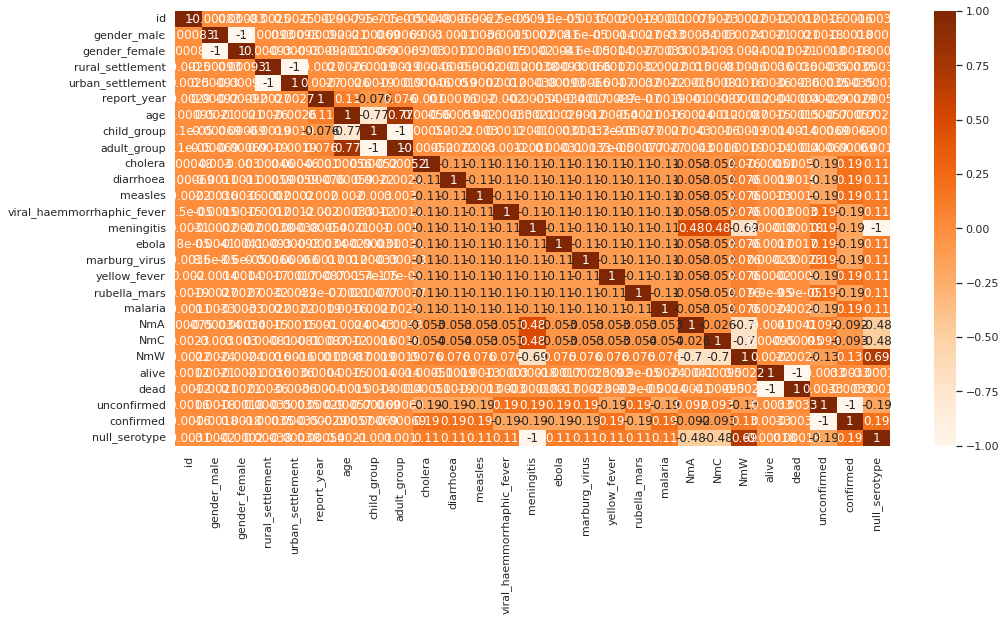

In [52]:
# Heatmap showing correlation between the attributes.
sns.heatmap(
    pandas_df.corr(), annot=True, cmap="Oranges"
) 

**Correlation Analysis**

Above is a graphical representation of the correlation between different features in the dataset. The heatmap displays a matrix of colors that represent the strength of the correlation between pairs of variables.

We can calculate the correlation between pairs of variables using a correlation coefficient, such as the Pearson correlation coefficient. This coefficient measures the linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation.

The above heatmap displays the correlation coefficients as colors in a matrix, with each variable plotted both on the x and y axis. The color of each cell in the matrix indicates the strength of the correlation between the corresponding pair of variables, with a color scale ranging from low (e.g. light maroon) to high (e.g. dark maroon).

A correlation heatmap can help you identify the relationships between pairs of variables in a dataset. You can use it to spot patterns and trends, and to identify variables that are strongly correlated (either positively or negatively). This information can be useful for exploratory data analysis and for identifying potential predictors in statistical models.

From the Above Matrix we can conclude a few things

Age and Child Group is highly correlated

NmW and Meningitis is highly correlated

# Q-Q plot



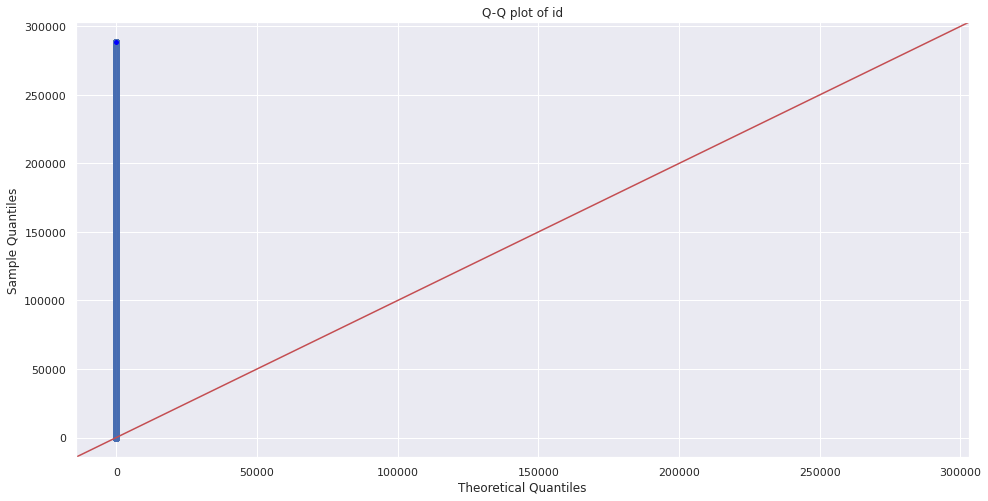

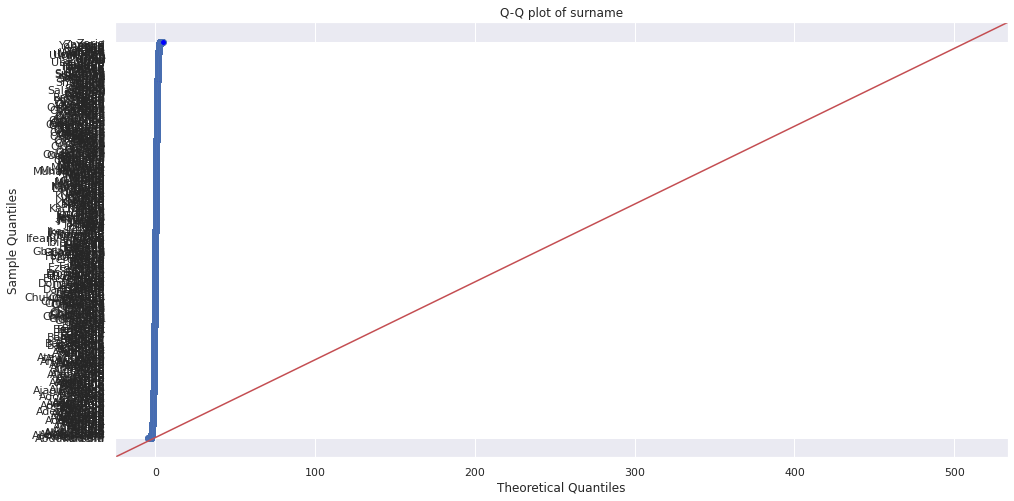

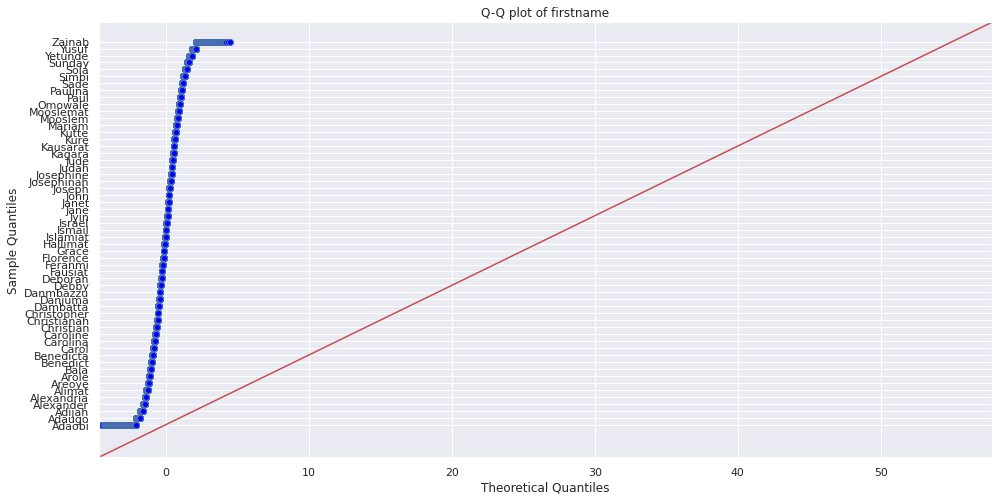

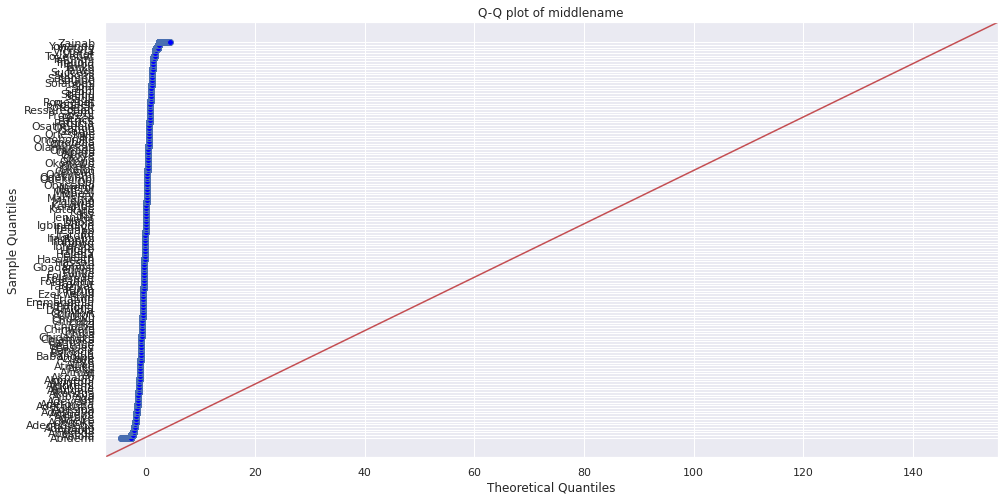

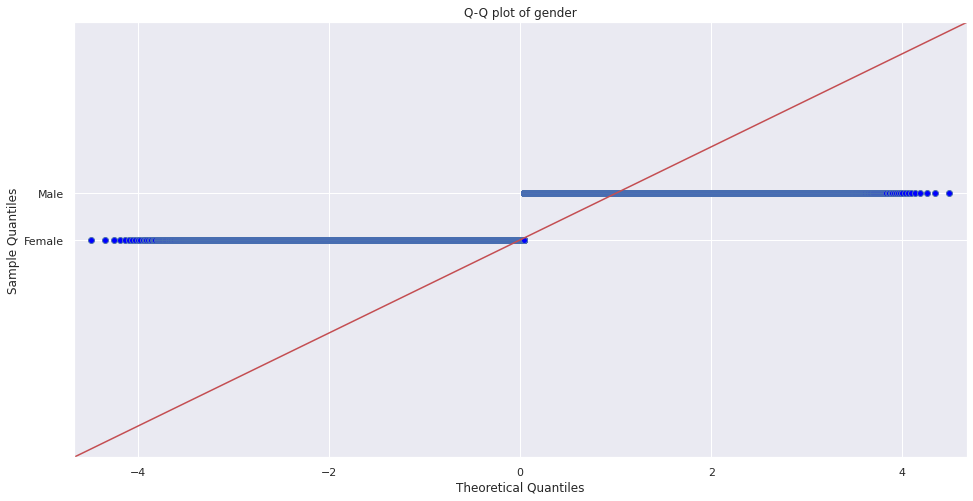

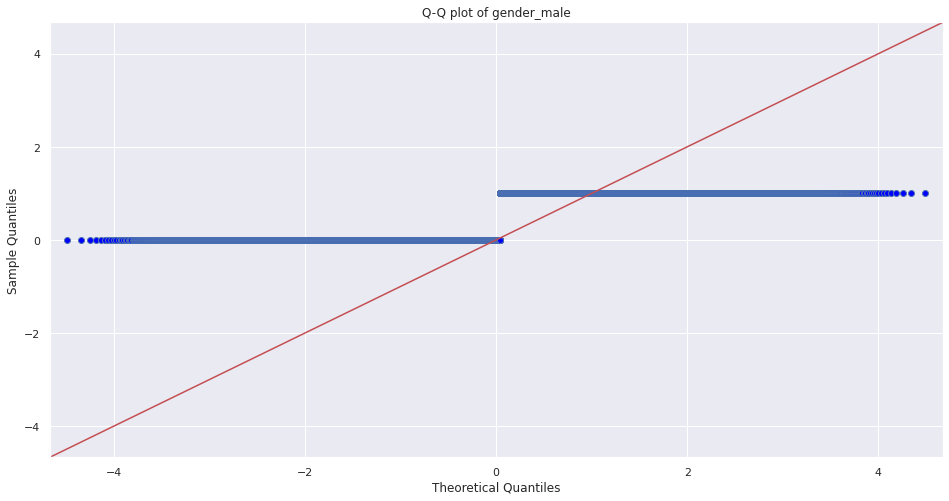

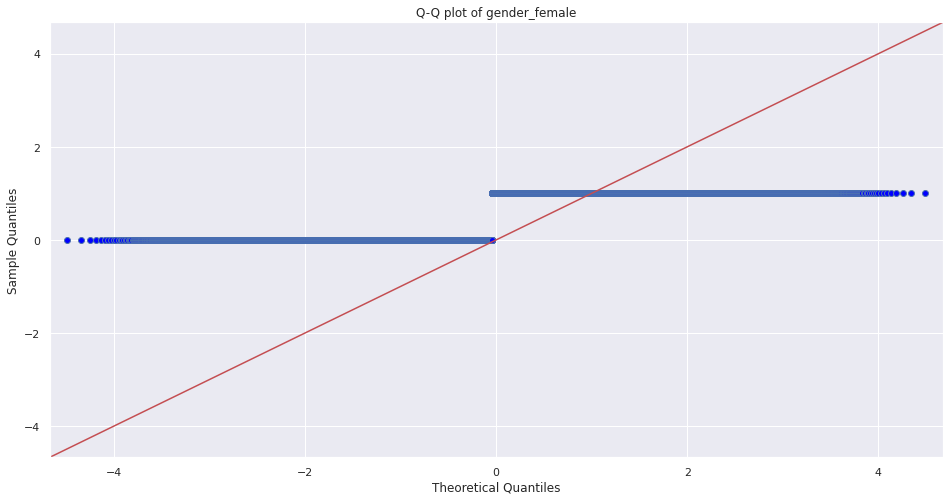

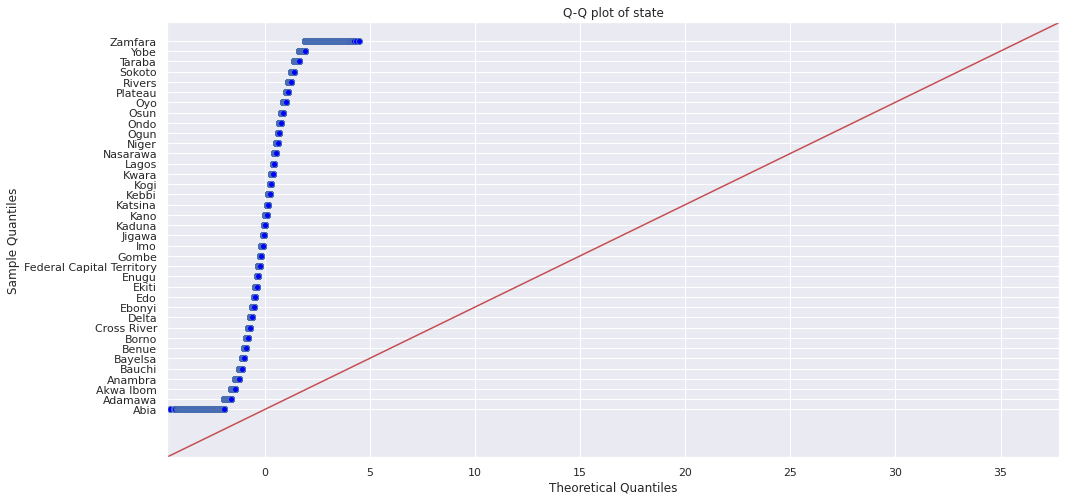

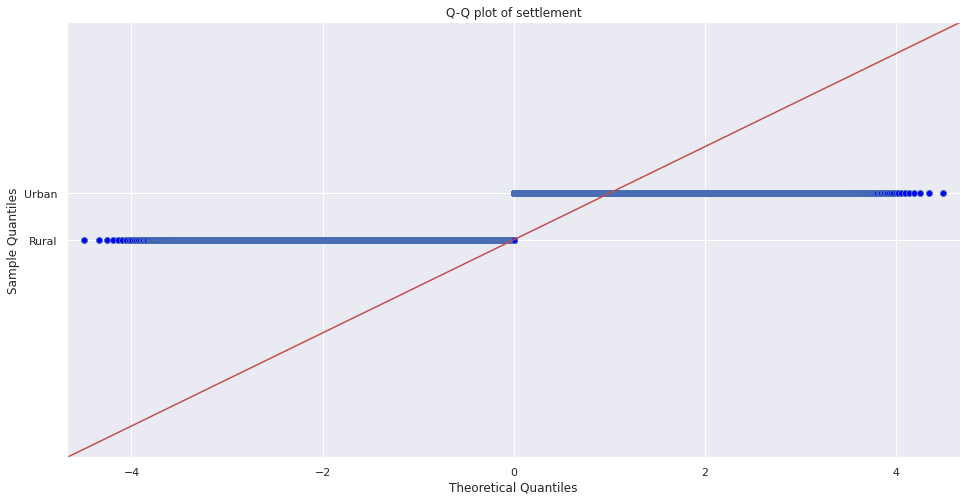

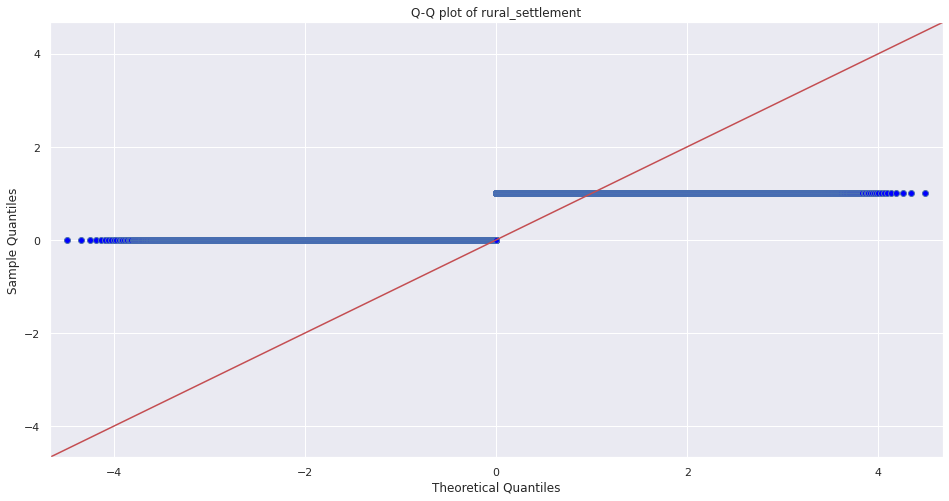

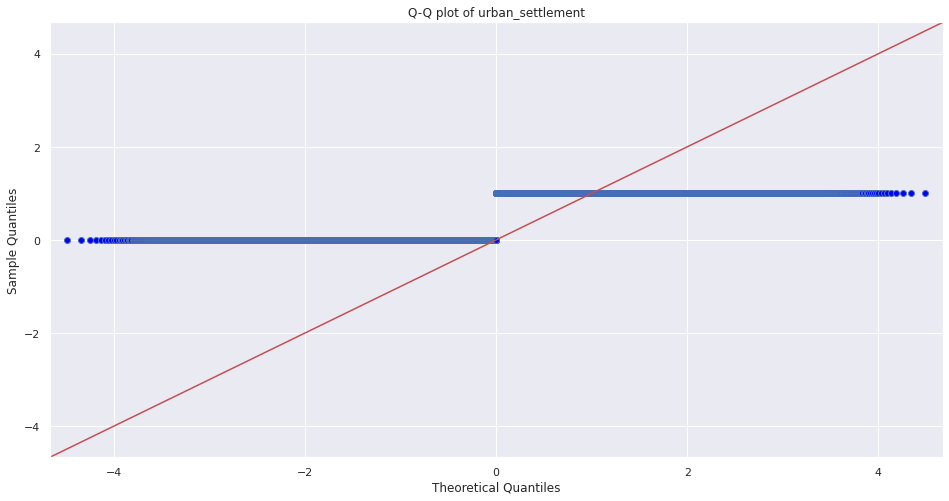

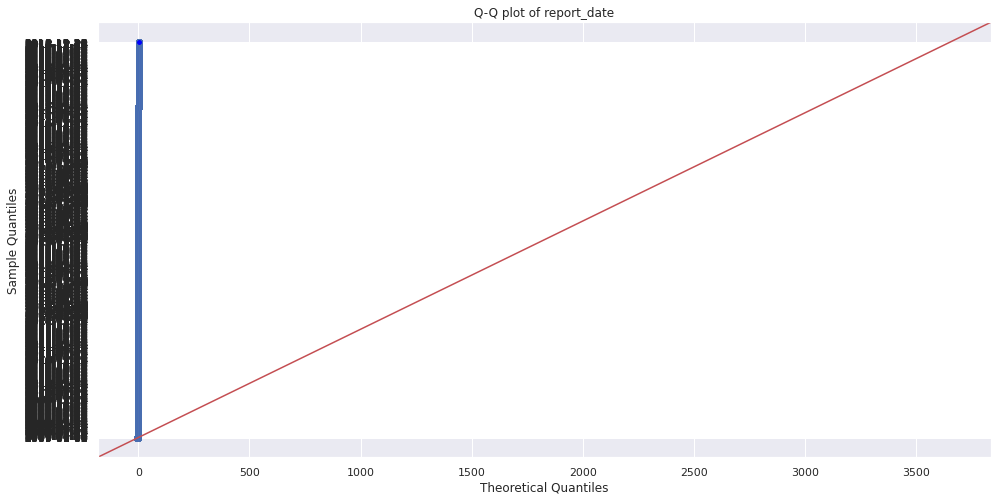

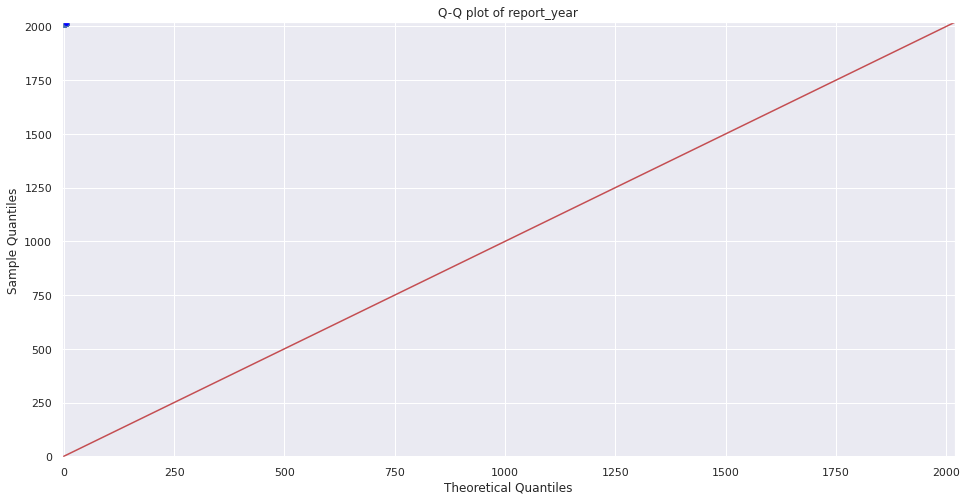

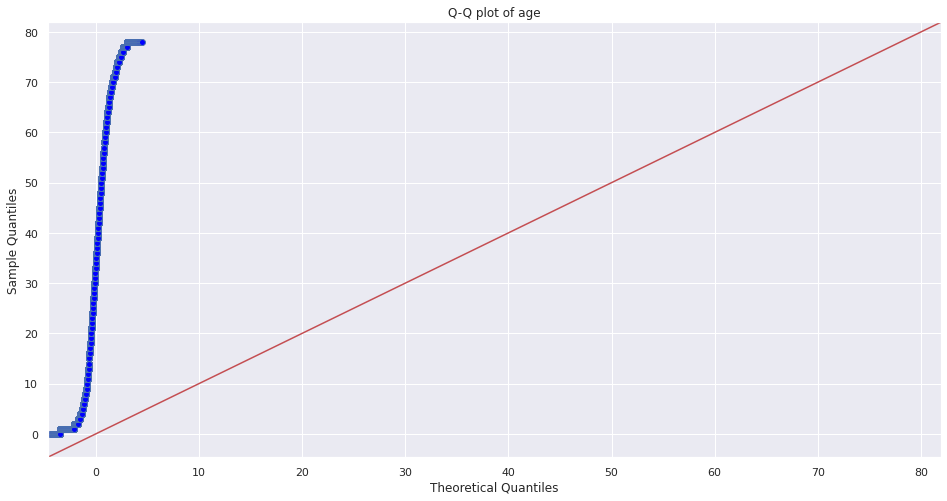

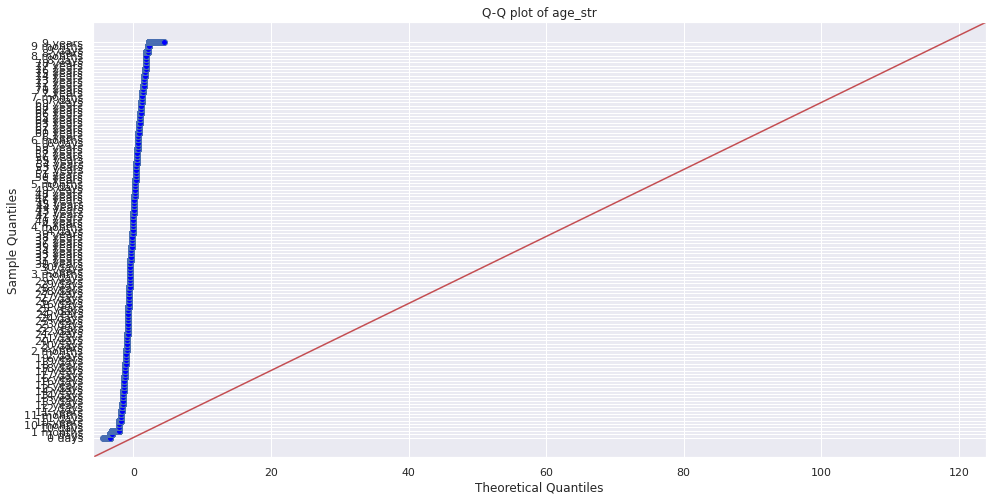

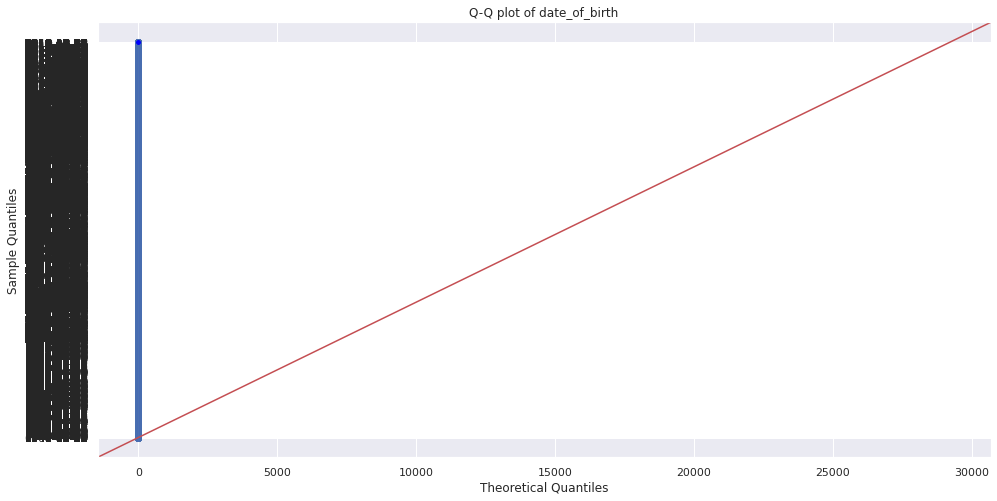

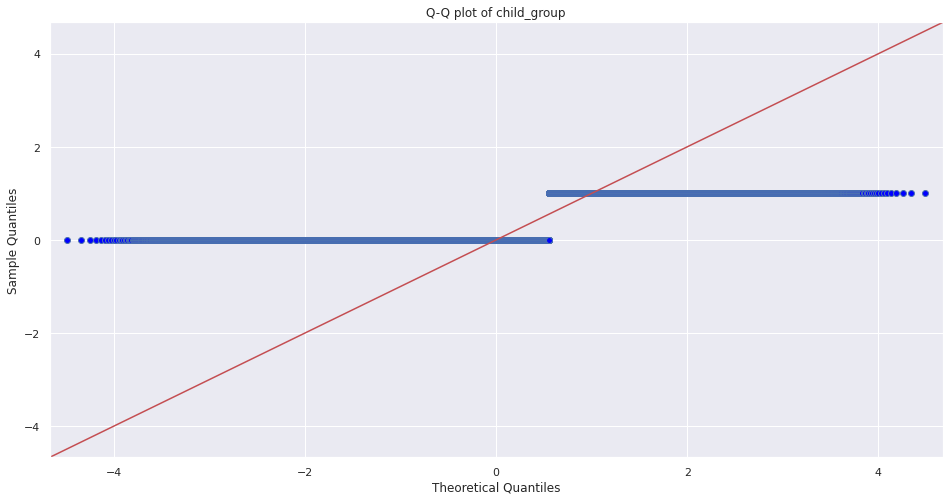

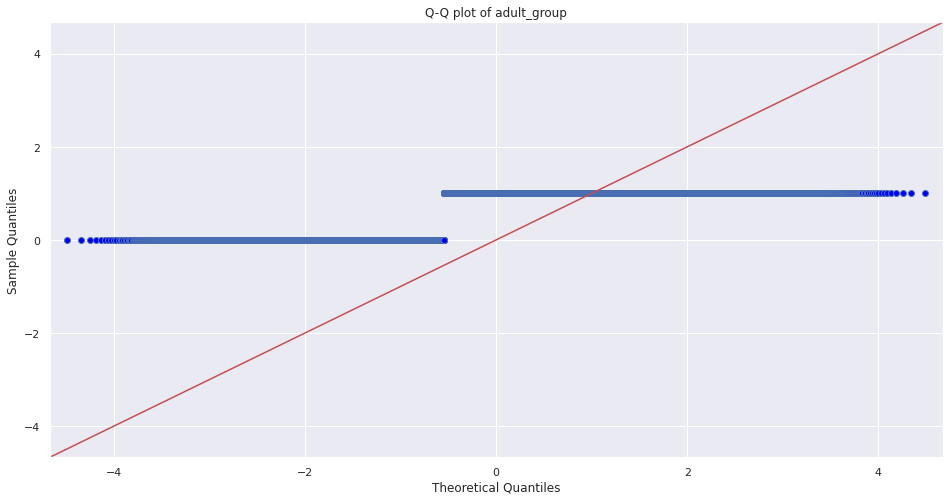

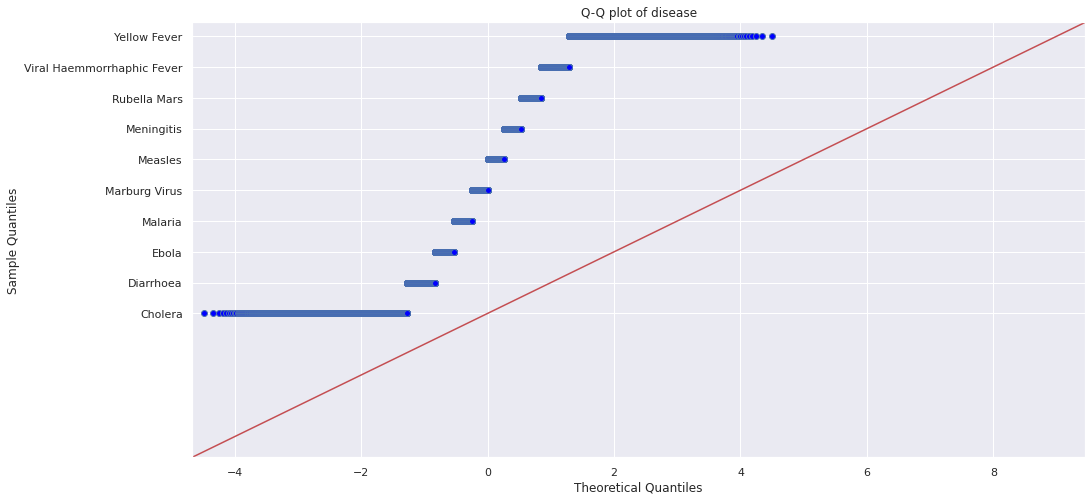

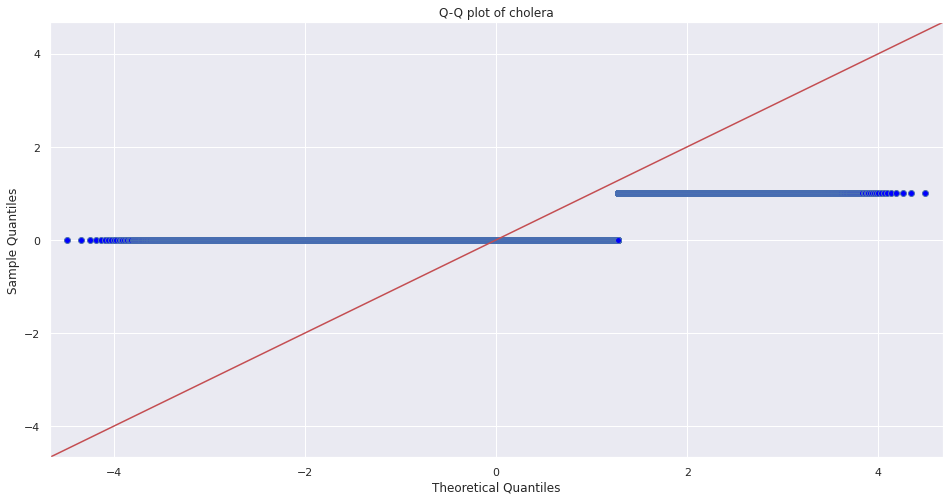

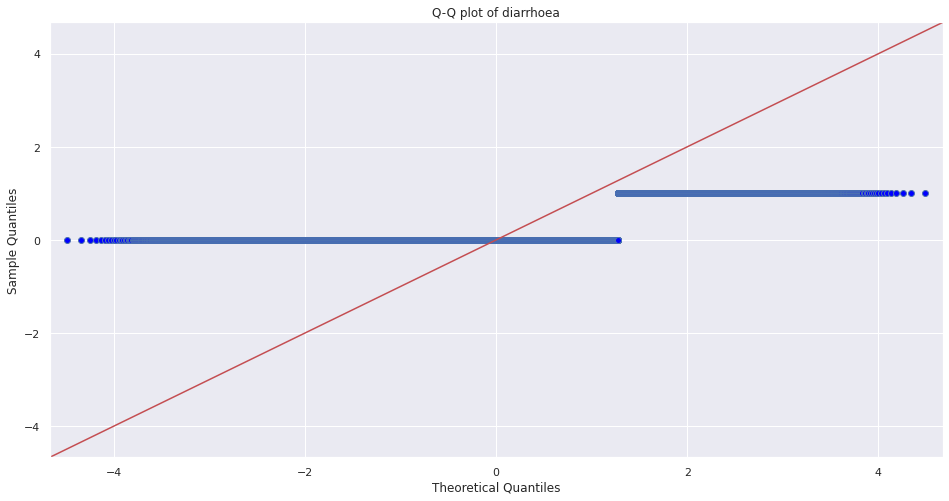

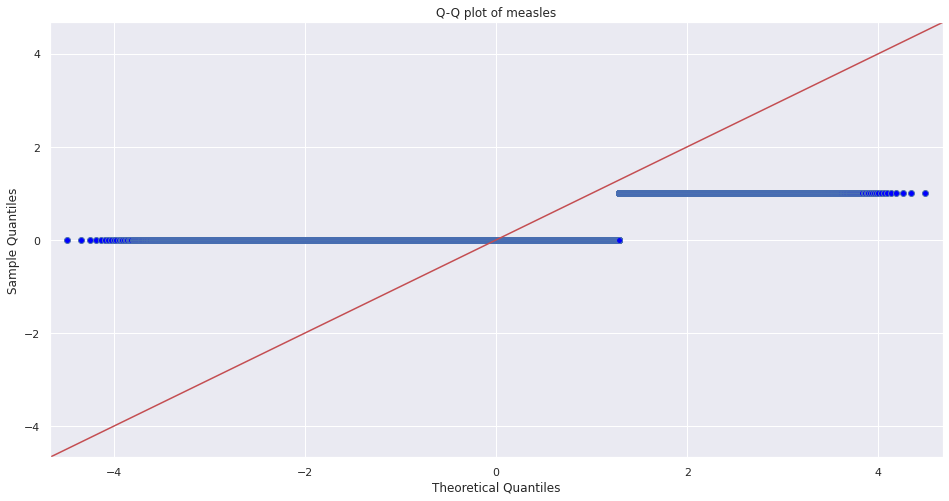

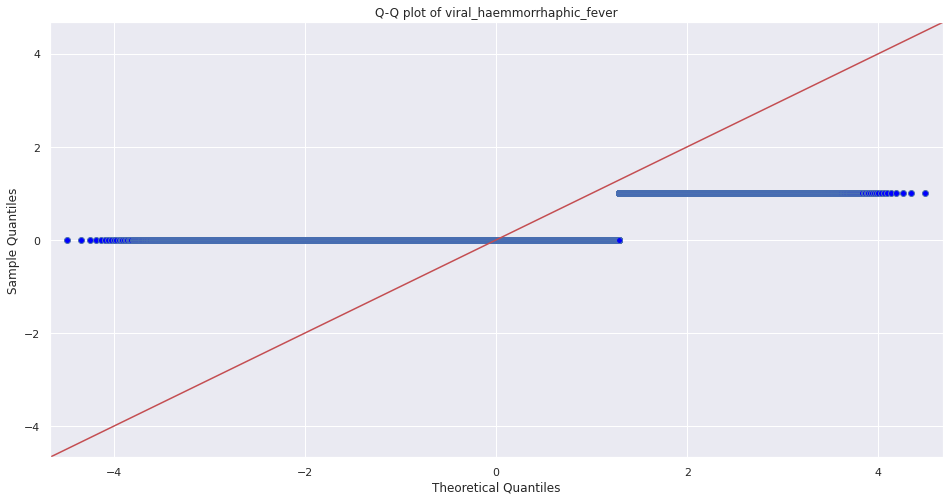

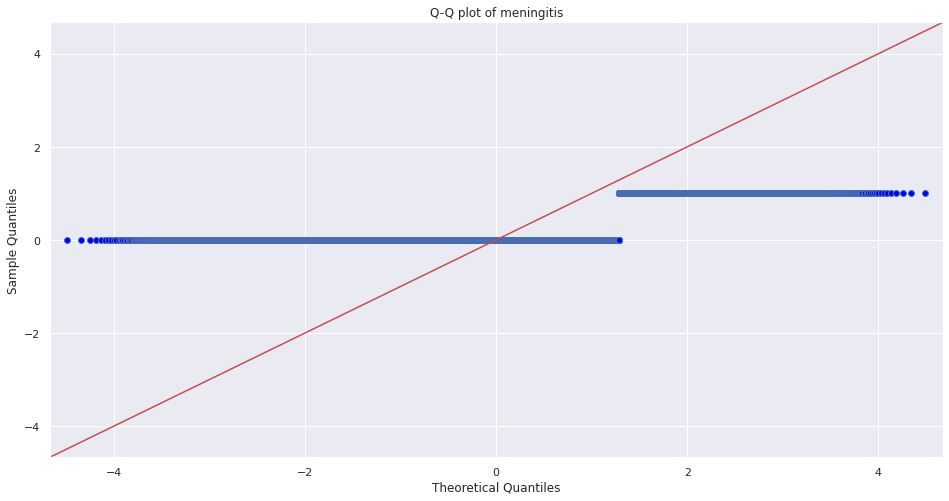

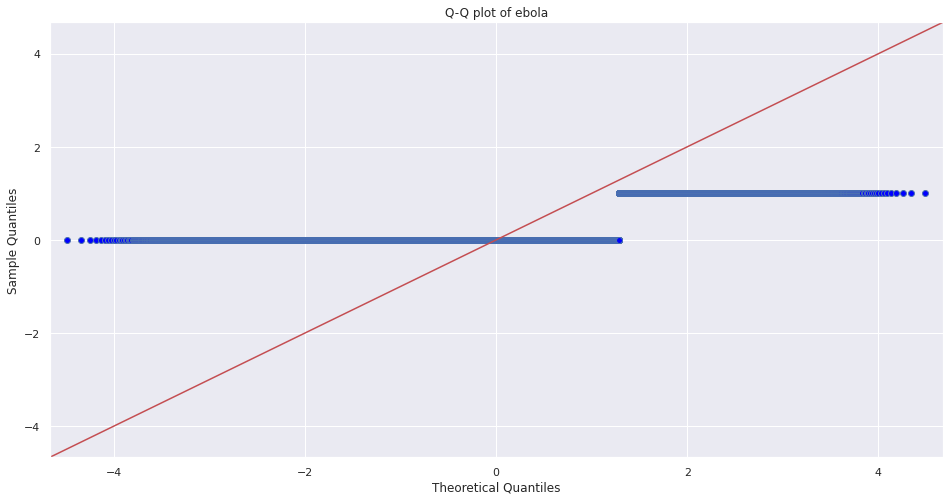

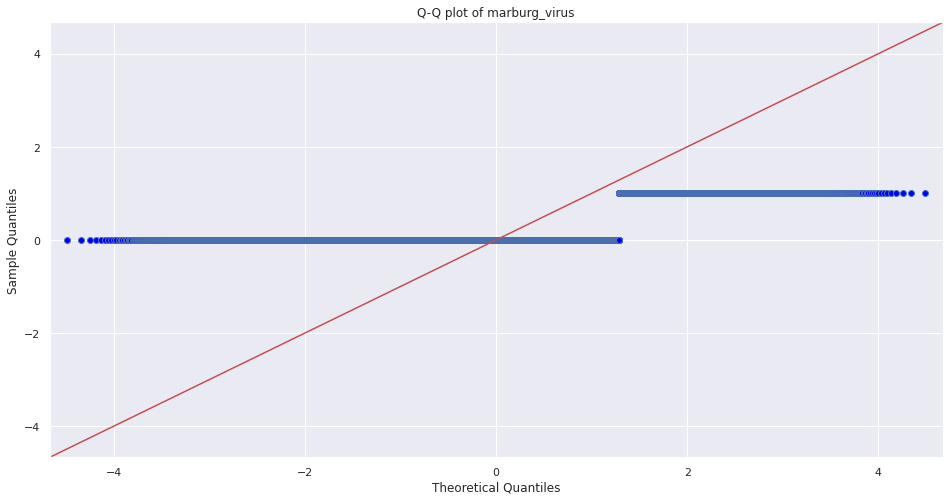

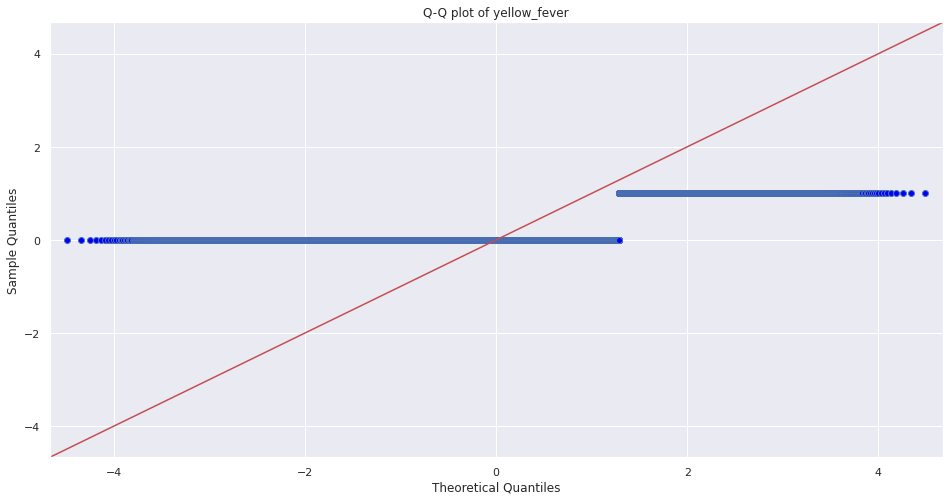

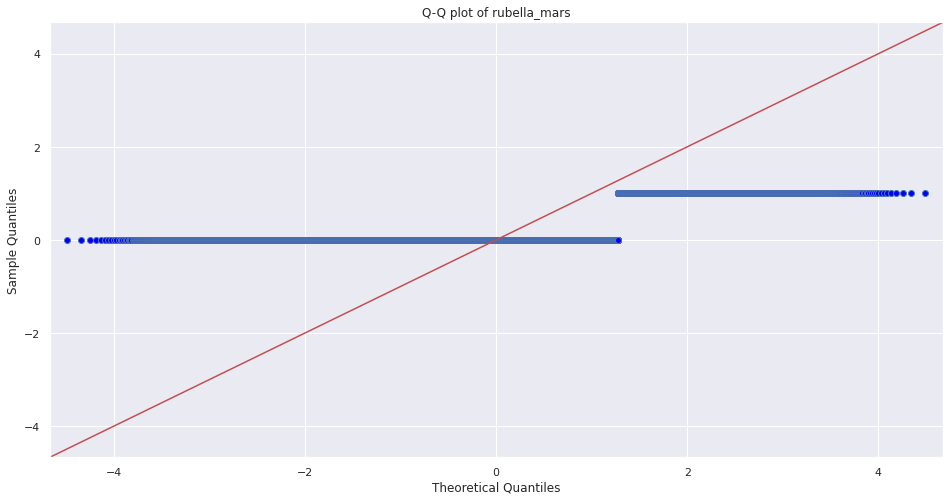

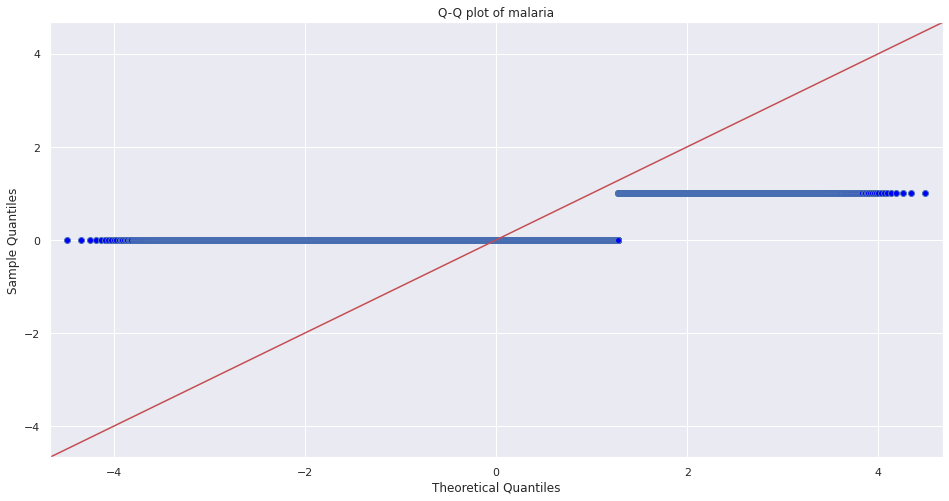

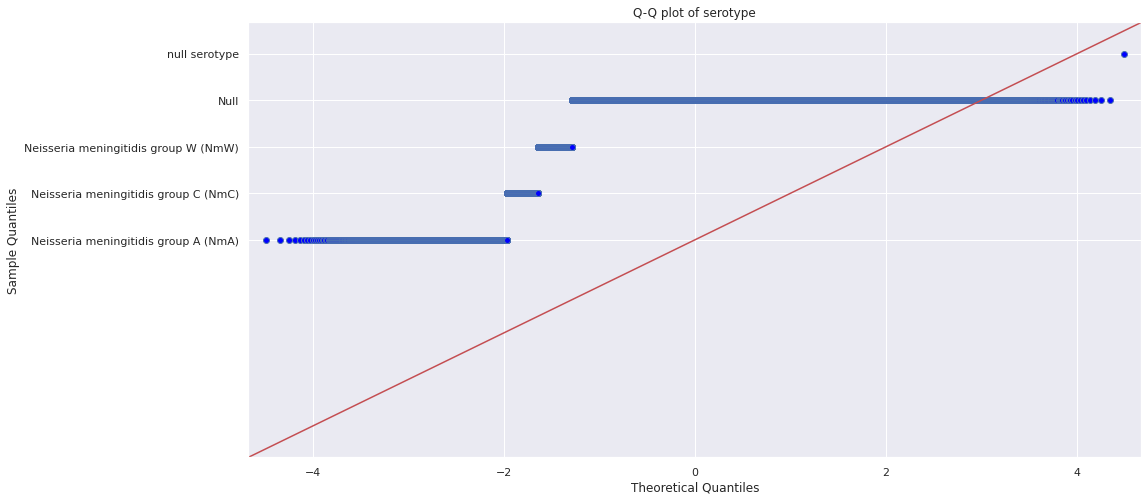

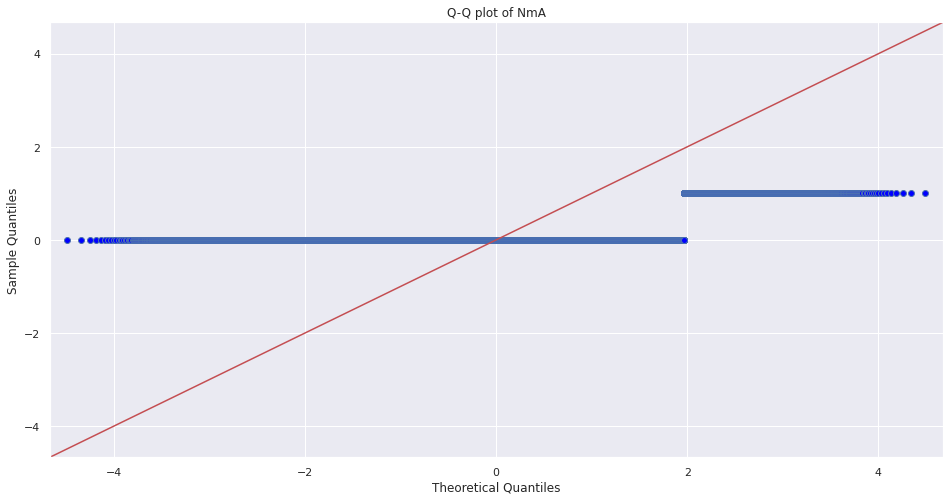

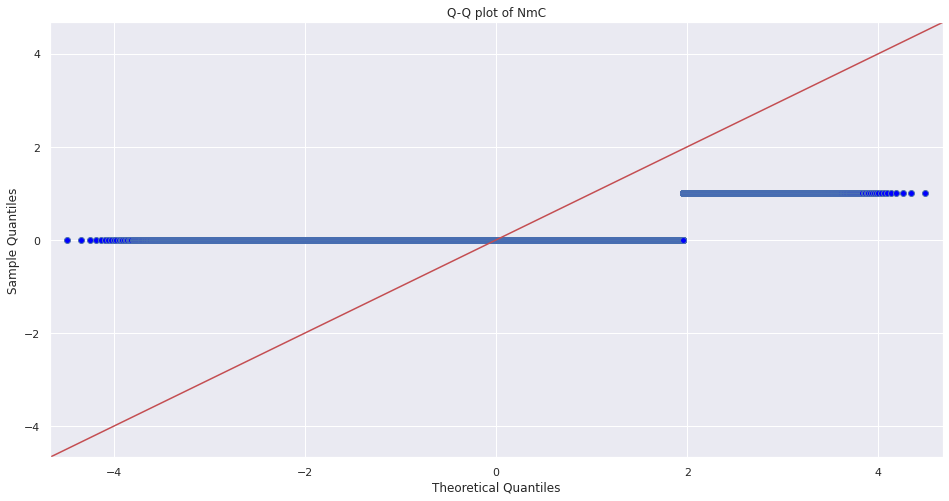

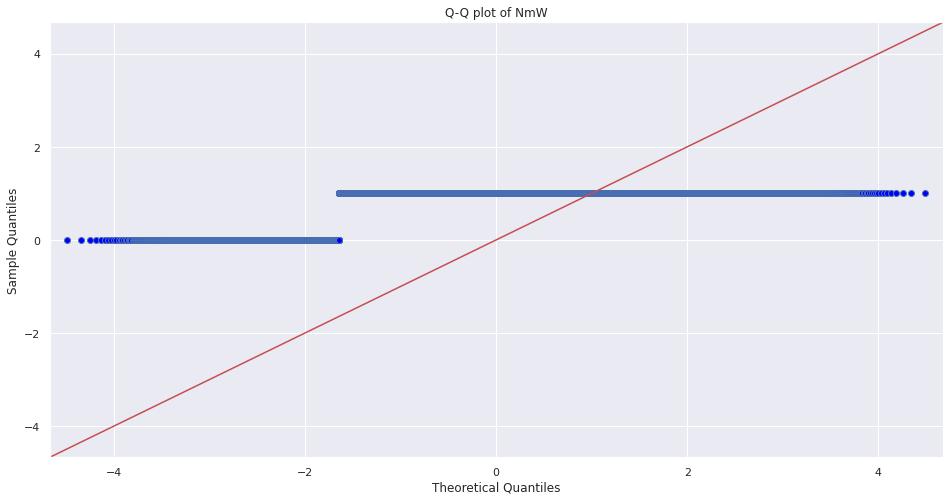

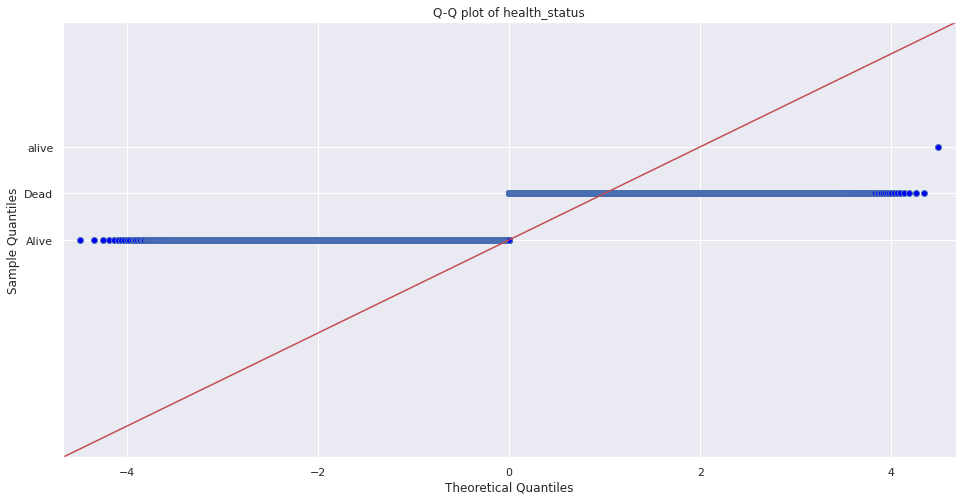

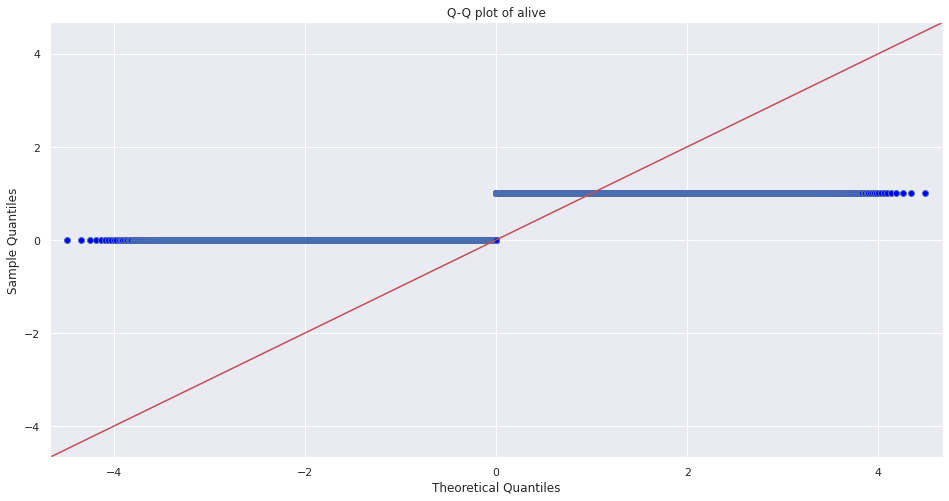

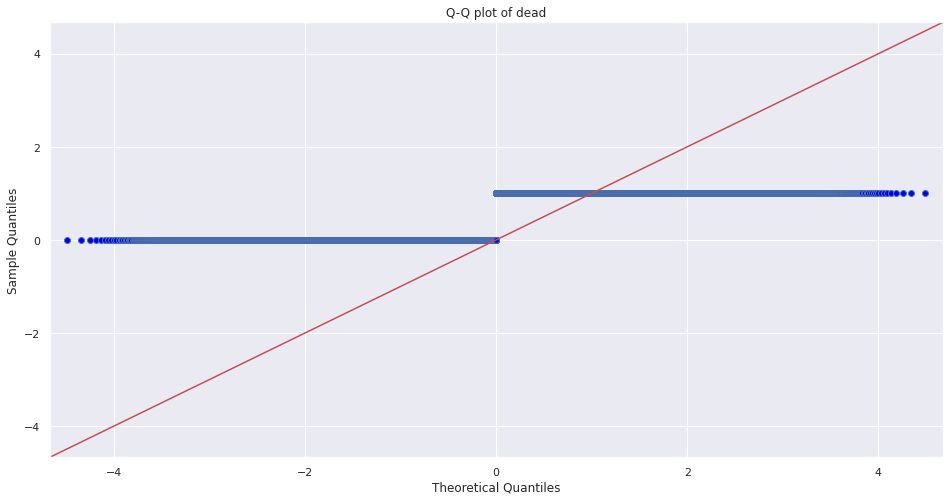

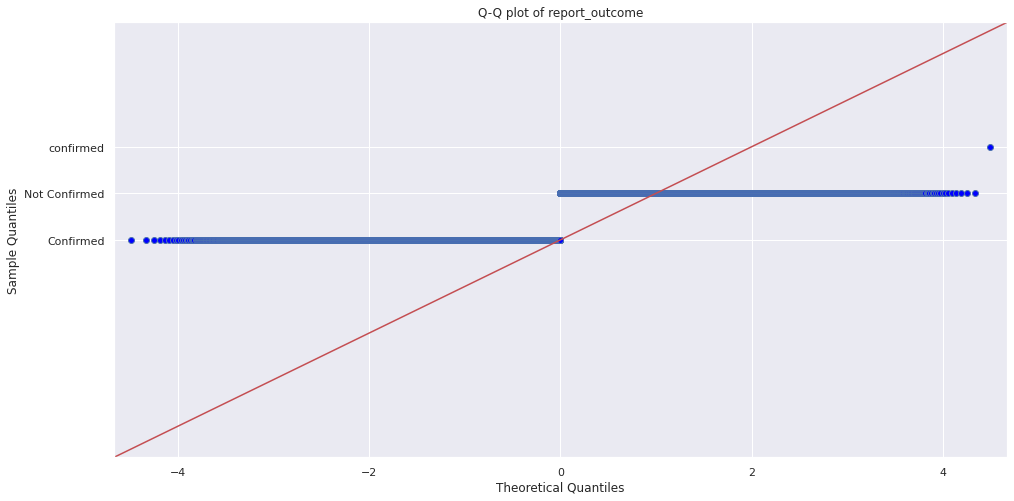

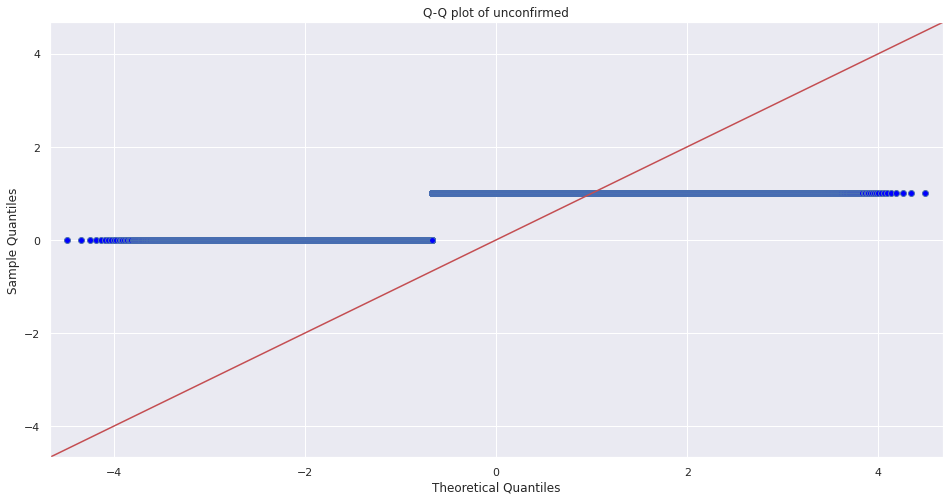

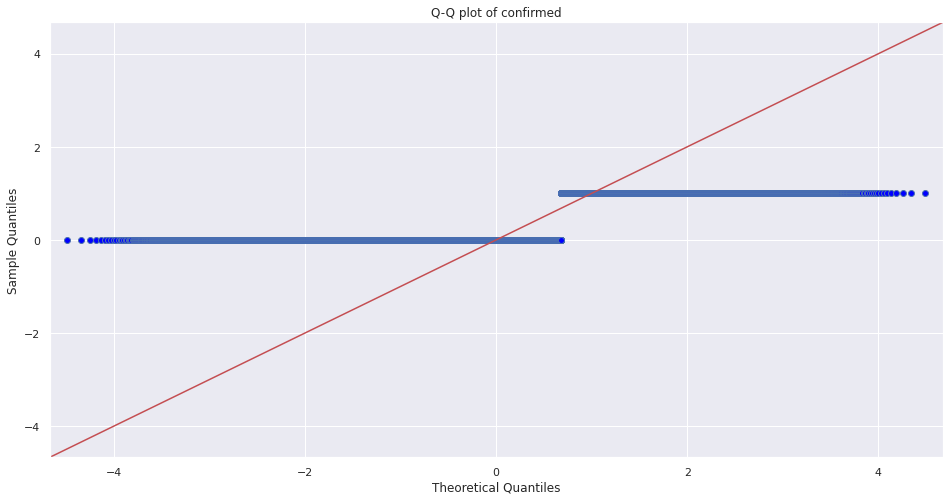

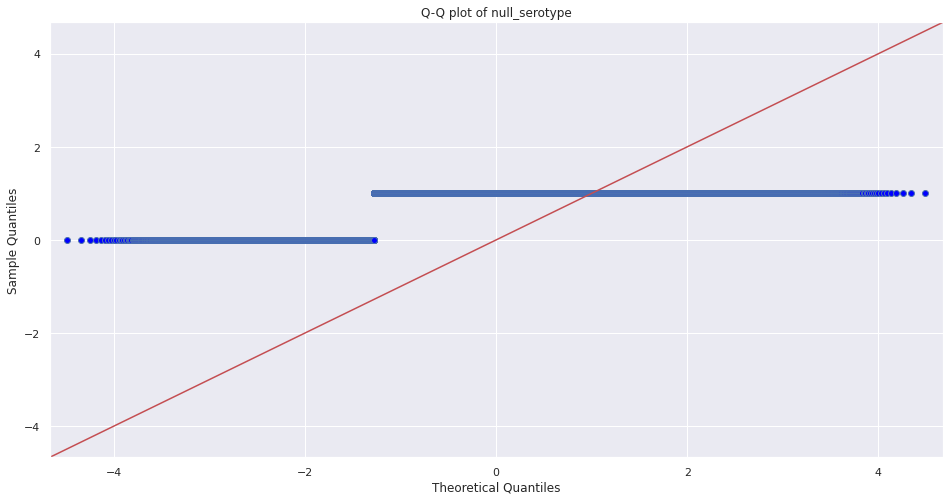

In [25]:
import statsmodels.api as sm
for col in pandas_df.columns:
    sm.qqplot(pandas_df[col], line='45')
    plt.title('Q-Q plot of ' + col)
    plt.show()

1 - Fixed acidity: The distribution of fixed acidity in red wines appears to be approximately normally distributed

2 - Volatile acidity: The distribution of volatile acidity in red wines is positively skewed

3 - State: The distribution of citric acid in red wines appears to be skewed to the right

4 - Age: The distribution of residual sugar in red wines is positively be skewed to the right

5 - Chlorides: The distribution of chlorides in red wines appears to be skewed to the right

6 - Free sulfur dioxide: The distribution of free sulfur dioxide in red wines appears to be normally distributed

7 - Total sulfur dioxide: The distribution of total sulfur dioxide in red wines appears to be positively skewed

8 - Density: The distribution of density in red wines is normally distributed

9 - pH: The distribution of pH in red wines is normally distributed

10 - Sulphates: The distribution of sulphates in red wines appears to be skewed to the right

11 - Alcohol: The distribution of alcohol in red wines appears to be approximately normally distributed

# H2O AutoML Execution

Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time.

In [24]:
df = h2o.H2OFrame(
    pandas_df
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [25]:
df.head()

id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,age_str,date_of_birth,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,0,2018-05-15 00:00:00,2018,32,32 years,1986-01-17 00:00:00,0,1,Cholera,1,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1
2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,0,2017-02-28 00:00:00,2017,32,32 years,1985-09-01 00:00:00,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,1,2012-03-02 00:00:00,2012,24,24 years,1988-05-01 00:00:00,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1
4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,0,2010-05-21 00:00:00,2010,63,63 years,1947-05-24 00:00:00,0,1,Measles,0,0,1,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,1,2017-08-28 00:00:00,2017,9,9 years,2008-01-07 00:00:00,1,0,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
6,Yakubu,Janet,Chioma,Female,0,1,Kaduna,Rural,1,0,2012-06-27 00:00:00,2012,44,44 years,1968-06-06 00:00:00,0,1,Ebola,0,0,0,0,0,1,0,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
7,Razak,Adaugo,Adaobi,Female,0,1,Taraba,Rural,1,0,2010-04-01 00:00:00,2010,61,61 years,1949-07-19 00:00:00,0,1,Yellow Fever,0,0,0,0,0,0,0,1,0,0,Null,0,0,1,Alive,1,0,Confirmed,0,1,1
8,Annakyi,Danmbazzu,Osagie,Male,1,0,Katsina,Rural,1,0,2015-10-04 00:00:00,2015,2,2 months,2014-12-18 00:00:00,1,0,Diarrhoea,0,1,0,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
9,Adejoro,Iyin,Osatimehin,Male,1,0,Katsina,Rural,1,0,2011-11-14 00:00:00,2011,54,54 years,1957-08-05 00:00:00,0,1,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
10,Okorie,Adaugo,Chika,Female,0,1,Osun,Urban,0,1,2014-06-17 00:00:00,2014,15,15 years,1999-10-19 00:00:00,1,0,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1


In [26]:
df.types  # Datatype of all attributes, here the result ("age") is int hence it can be solved using the regression. If this problem was supposed to solved using the classification method - this attributes datatype must be converted into enum

{'id': 'int',
 'surname': 'enum',
 'firstname': 'enum',
 'middlename': 'enum',
 'gender': 'enum',
 'gender_male': 'int',
 'gender_female': 'int',
 'state': 'enum',
 'settlement': 'enum',
 'rural_settlement': 'int',
 'urban_settlement': 'int',
 'report_date': 'time',
 'report_year': 'int',
 'age': 'int',
 'age_str': 'enum',
 'date_of_birth': 'time',
 'child_group': 'int',
 'adult_group': 'int',
 'disease': 'enum',
 'cholera': 'int',
 'diarrhoea': 'int',
 'measles': 'int',
 'viral_haemmorrhaphic_fever': 'int',
 'meningitis': 'int',
 'ebola': 'int',
 'marburg_virus': 'int',
 'yellow_fever': 'int',
 'rubella_mars': 'int',
 'malaria': 'int',
 'serotype': 'enum',
 'NmA': 'int',
 'NmC': 'int',
 'NmW': 'int',
 'health_status': 'enum',
 'alive': 'int',
 'dead': 'int',
 'report_outcome': 'enum',
 'unconfirmed': 'int',
 'confirmed': 'int',
 'null_serotype': 'int'}

In [27]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [28]:
print(df_train.shape)
print(df_test.shape)

(227670, 40)
(56814, 40)


In [29]:
df_train.head()

id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,age_str,date_of_birth,child_group,adult_group,disease,cholera,diarrhoea,measles,viral_haemmorrhaphic_fever,meningitis,ebola,marburg_virus,yellow_fever,rubella_mars,malaria,serotype,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,0,2018-05-15 00:00:00,2018,32,32 years,1986-01-17 00:00:00,0,1,Cholera,1,0,0,0,0,0,0,0,0,0,null serotype,0,0,0,alive,1,0,confirmed,0,1,1
3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,1,2012-03-02 00:00:00,2012,24,24 years,1988-05-01 00:00:00,0,1,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Dead,0,1,Not Confirmed,1,0,1
4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,0,2010-05-21 00:00:00,2010,63,63 years,1947-05-24 00:00:00,0,1,Measles,0,0,1,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,1,2017-08-28 00:00:00,2017,9,9 years,2008-01-07 00:00:00,1,0,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
7,Razak,Adaugo,Adaobi,Female,0,1,Taraba,Rural,1,0,2010-04-01 00:00:00,2010,61,61 years,1949-07-19 00:00:00,0,1,Yellow Fever,0,0,0,0,0,0,0,1,0,0,Null,0,0,1,Alive,1,0,Confirmed,0,1,1
8,Annakyi,Danmbazzu,Osagie,Male,1,0,Katsina,Rural,1,0,2015-10-04 00:00:00,2015,2,2 months,2014-12-18 00:00:00,1,0,Diarrhoea,0,1,0,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
9,Adejoro,Iyin,Osatimehin,Male,1,0,Katsina,Rural,1,0,2011-11-14 00:00:00,2011,54,54 years,1957-08-05 00:00:00,0,1,Rubella Mars,0,0,0,0,0,0,0,0,1,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
10,Okorie,Adaugo,Chika,Female,0,1,Osun,Urban,0,1,2014-06-17 00:00:00,2014,15,15 years,1999-10-19 00:00:00,1,0,Marburg Virus,0,0,0,0,0,0,1,0,0,0,Null,0,0,1,Alive,1,0,Confirmed,1,0,1
11,Muhammadu,Adijah,Cathrine,Female,0,1,Niger,Urban,0,1,2015-05-12 00:00:00,2015,17,17 years,1998-06-07 00:00:00,1,0,Cholera,1,0,0,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1
12,Okerewke,Kure,Osahon,Male,1,0,Cross River,Rural,1,0,2012-09-28 00:00:00,2012,50,50 years,1962-02-04 00:00:00,0,1,Diarrhoea,0,1,0,0,0,0,0,0,0,0,Null,0,0,1,Alive,1,0,Not Confirmed,1,0,1


In [30]:
X = df.columns
print(X)

['id', 'surname', 'firstname', 'middlename', 'gender', 'gender_male', 'gender_female', 'state', 'settlement', 'rural_settlement', 'urban_settlement', 'report_date', 'report_year', 'age', 'age_str', 'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead', 'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype']


# Start to train in 10 models by AutoML

In [36]:
# Set target and predictor variables
y = "age"
X.remove(y)  # Removing the result from our predictors data
print(X)

['id', 'surname', 'firstname', 'middlename', 'gender', 'gender_male', 'gender_female', 'state', 'settlement', 'rural_settlement', 'urban_settlement', 'report_date', 'report_year', 'age_str', 'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead', 'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype']


Run AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time..

In [37]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [ ]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models. Pass the data through H20AutoML

AutoML progress: |███████████████████████████████

Interpreting the above results

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [ ]:
# View the AutoML Leaderboard
print(
    aml.leaderboard
)  

# Leaderboard showing the performance of different models on the dataset.

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the best performing model is

StackedEnsemble_AllModels_1_AutoML_1_20230228_225118 with an rmse score of 0.19202

The second-best model is GBM_1_AutoML_1_20230228_225118 with an rmse score of 0.194311

The models are then listed in descending order based on their rmse scores.

In [ ]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

In [ ]:
best_model.algo

In [ ]:
best_model = aml.leader
best_model.model_performance(df_train)

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [ ]:
if best_model.algo in [
    "gbm",
    "glm",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

In [ ]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train=True))

In [ ]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d


In [ ]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

In [ ]:
predictions = best_model.predict(df_test)

In [ ]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

In [ ]:
print(X)

# Analysing relation between all variables

When all independent variables were plotted against 'age' variable it is observed that for'Disease' and 'State' roughly a linear line is obtained. So it can be concluded from this plot that variables Disease and State have linear relation with Price.

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [61]:
#df = pandas_df[['gender_male', 'gender_female', 'rural_settlement', 'urban_settlement', 'report_year', 'age' , 'child_group', 'adult_group', 'cholera'	,'diarrhoea',	'measles',	'viral_haemmorrhaphic_fever',	'meningitis',	'ebola',	'marburg_virus',	'yellow_fever',	'rubella_mars',	'NmA',	'NmC',	'NmW',	'alive',	'dead',	'unconfirmed',	'confirmed'	, 'null_serotype']].dropna() #subset the dataframe

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = pandas_df[['gender_male', 'gender_female', 'rural_settlement', 'urban_settlement', 'report_year', 'age' , 'child_group', 'adult_group','cholera'	,'diarrhoea',	'measles',	'viral_haemmorrhaphic_fever',	'meningitis',	'ebola',	'marburg_virus',	'yellow_fever',	'rubella_mars',	'NmA',	'NmC',	'NmW',	'alive',	'dead',	'unconfirmed',	'confirmed'	, 'null_serotype']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                       feature           VIF
0                  gender_male           inf
1                gender_female           inf
2             rural_settlement           inf
3             urban_settlement           inf
4                  report_year  1.012190e+00
5                          age  2.506080e+00
6                  child_group           inf
7                  adult_group           inf
8                      cholera  1.800795e+00
9                    diarrhoea  1.799818e+00
10                     measles  1.797866e+00
11  viral_haemmorrhaphic_fever  1.976339e+00
12                  meningitis           inf
13                       ebola  1.969595e+00
14               marburg_virus  1.977198e+00
15                yellow_fever  1.796813e+00
16                rubella_mars  1.980520e+00
17                         NmA  6.865800e+03
18                         NmC  6.953227e+03
19                         NmW  1.346419e+04
20                       alive           inf
21        

Considering the significance value of 0.05 because accuracy in predicting the age of the abalone is not that critical

Except PM2.5 has the p-value 0.646, which is greater and hence it is a non significant feature, all other features are significant.

VIF for 'alive','dead','unconfirmed','confirmed' and 'meningitis' and many more parameters is inf.

Now, will drop the variables unconfirmed, confirmed and YearBuilt. 


Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [17]:
import statsmodels.formula.api as smf #OLS model Library
#Using OLS for finding the p value to check the significant features
results = smf.ols(
    "age ~ gender_male + gender_female + rural_settlement + urban_settlement + report_year + child_group + adult_group + cholera + diarrhoea + measles + viral_haemmorrhaphic_fever + meningitis + ebola + marburg_virus + yellow_fever + rubella_mars + NmA + NmC + NmW + alive + dead + unconfirmed + confirmed + null_serotype",
    data=pandas_df,
).fit()

# Print out the statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                 2.380e+04
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        03:32:01   Log-Likelihood:            -1.1554e+06
No. Observations:              284484   AIC:                         2.311e+06
Df Residuals:                  284465   BIC:                         2.311e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -193.9609      5.820    -33.325      0.000    -205.368    -182.553
gender_male                  -96.9475      2.910    -33.312      0.000    -102.652     -91.243
gender_female                -97.0134      2.910    -33.336      0.000    -102.717     -91.309
rural_settlement             -96.9530      2.910    -33.315      0.000    -102.657     -91.249
urban_settlement             -97.0078      2.910    -33.332      0.000    -102.712     -91.304
report_year                    0.3909      0.009     42.488      0.000       0.373       0.409
child_group                 -115.8125      2.909    -39.818      0.000    -121.513    -110.112
adult_group                  -78.1484      2.912    -26.837      0.000     -83.856     -72.441
cholera                        0.1054      0.118      0.896      0.370      -0.125       0.336
diarrhoea                      0.1090      0.118      0.927      0.354      -0.122       0.339
measles                        0.0115      0.118      0.098      0.922      -0.219       0.242
viral_haemmorrhaphic_fever     0.0769      0.124      0.622      0.534      -0.165       0.319
meningitis                   -97.0846      2.911    -33.351      0.000    -102.790     -91.379
ebola                          0.0335      0.124      0.271      0.787      -0.209       0.276
marburg_virus                  0.1304      0.124      1.056      0.291      -0.112       0.372
yellow_fever                  -0.0023      0.118     -0.020      0.984      -0.233       0.228
rubella_mars                  -0.0712      0.123     -0.577      0.564      -0.313       0.171
NmA                           15.8998     14.052      1.132      0.258     -11.641      43.441
NmC                           15.7803     14.052      1.123      0.261     -11.761      43.321
NmW                           15.5427     14.050      1.106      0.269     -11.995      43.081
alive                        -96.9705      2.910    -33.321      0.000    -102.674     -91.267
dead                         -96.9903      2.910    -33.327      0.000    -102.694     -91.286
unconfirmed                  -96.9725      2.910    -33.319      0.000    -102.677     -91.268
confirmed                    -96.9884      2.910    -33.326      0.000    -102.692     -91.284
null_serotype                -96.8763      2.911    -33.278      0.000    -102.582     -91.170
==============================================================================
Omnibus:                     9151.100   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4252.683
Skew:                           0.015   Prob(JB):                         0.00
Kurtosis:                       2.402   Cond. No.                     1.89e+19
============================

As seen from the OLS summary p-value for 'NmA', 'NmC' and 'NmW', is greater than 0.05.
An extra variable 'NmA' is unneccsary as 'NmC','NmB' and 'chloera' will help us tell the location. 

Dropping them will give us a model with all variables whose p-values are less than 0.05. 

The accuracy for this model is 60.1%. Now will check VIF and p-values again for the selected independent variables.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = pandas_df[['gender_male', 'gender_female', 'rural_settlement', 'urban_settlement', 'report_year', 'age' , 'child_group', 'adult_group', 'cholera'	,'diarrhoea',	'measles',	'viral_haemmorrhaphic_fever',	'meningitis',	'ebola',	'marburg_virus',	'yellow_fever',	'rubella_mars',	'alive',	'dead',	'unconfirmed',	'confirmed']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,gender_male,inf
1,gender_female,inf
2,rural_settlement,inf
3,urban_settlement,inf
4,report_year,1.012178
5,age,2.506039
6,child_group,inf
7,adult_group,inf
8,cholera,1.800763
9,diarrhoea,1.799818


VIF for all variables are less than 10. 

In [20]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols("age ~ gender_male + gender_female + rural_settlement + urban_settlement + report_year + child_group + adult_group + cholera + diarrhoea + measles + viral_haemmorrhaphic_fever + meningitis + ebola + marburg_virus + yellow_fever + rubella_mars + NmA + NmC + NmW + alive + dead", 
                   data=pandas_df,
                  ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                 2.520e+04
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        03:37:22   Log-Likelihood:            -1.1554e+06
No. Observations:              284484   AIC:                         2.311e+06
Df Residuals:                  284466   BIC:                         2.311e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -258.5852      7.760    -33.321      0.000    -273.795    -243.375
gender_male                 -129.2597      3.880    -33.312      0.000    -136.865    -121.654
gender_female               -129.3256      3.880    -33.329      0.000    -136.931    -121.720
rural_settlement            -129.2652      3.880    -33.314      0.000    -136.870    -121.660
urban_settlement            -129.3200      3.880    -33.327      0.000    -136.925    -121.715
report_year                    0.3909      0.009     42.489      0.000       0.373       0.409
child_group                 -148.1247      3.879    -38.191      0.000    -155.727    -140.523
adult_group                 -110.4605      3.882    -28.455      0.000    -118.069    -102.852
cholera                        0.1054      0.118      0.897      0.370      -0.125       0.336
diarrhoea                      0.1090      0.118      0.927      0.354      -0.122       0.340
measles                        0.0115      0.118      0.098      0.922      -0.219       0.242
viral_haemmorrhaphic_fever     0.0848      0.118      0.720      0.471      -0.146       0.316
meningitis                    -0.2004      0.144     -1.388      0.165      -0.483       0.082
ebola                          0.0415      0.118      0.351      0.725      -0.190       0.273
marburg_virus                  0.1383      0.118      1.175      0.240      -0.092       0.369
yellow_fever                  -0.0023      0.118     -0.020      0.984      -0.233       0.228
rubella_mars                  -0.0632      0.118     -0.538      0.591      -0.294       0.167
NmA                           15.9078     14.052      1.132      0.258     -11.633      43.449
NmC                           15.7883     14.052      1.124      0.261     -11.752      43.329
NmW                           15.5507     14.050      1.107      0.268     -11.987      43.089
alive                       -129.2827      3.880    -33.318      0.000    -136.888    -121.678
dead                        -129.3025      3.880    -33.323      0.000    -136.908    -121.697
==============================================================================
Omnibus:                     9151.159   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4252.703
Skew:                           0.015   Prob(JB):                         0.00
Kurtosis:                       2.402   Cond. No.                     2.96e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matri

P-values for all the variables are less than 0.05 and the accuracy is 76.4%. It is unaffected even after removing 'Address' and 'Date' tells us that these two variables were not important for calculating 'Price'.

In [27]:
#Dropping the unecessary features as discussed above
dfpd = pd.read_csv("https://raw.githubusercontent.com/ShwetaBulchandani/DataScienceEngineeringMethods_002769540/main/meningitis_dataset.csv")
dfpd1=dfpd.drop(['alive','dead','unconfirmed','confirmed','age_str','null_serotype', 'id','middlename','gender_male', 'gender_female', 'urban_settlement', 'rural_settlement', 'cholera', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever' , 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'NmA', 'NmC', 'NmW', 'serotype','report_outcome', 'date_of_birth'], axis=1)


In [28]:
dfpd1

,surname,firstname,gender,state,settlement,report_date,report_year,age,child_group,adult_group,disease,health_status
0,Solade,Grace,Female,Rivers,Rural,2018-05-15,2018,32,0,1,Cholera,alive
1,Eneche,Kure,Male,Ebonyi,Rural,2017-02-28,2017,32,0,1,Marburg Virus,Alive
2,Sanusi,Adaugo,Female,Ogun,Urban,2012-03-02,2012,24,0,1,Marburg Virus,Dead
3,Sowore,Mooslemat,Female,Ondo,Rural,2010-05-21,2010,63,0,1,Measles,Alive
4,Abdusalam,Yusuf,Male,Oyo,Urban,2017-08-28,2017,9,1,0,Rubella Mars,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...
284479,Mukthar,Alimat,Female,Cross River,Rural,2012-08-24,2012,67,0,1,Ebola,Dead
284480,Akenzua,Deborah,Female,Kwara,Urban,2009-01-19,2009,64,0,1,Ebola,Dead
284481,Isa,Deborah,Female,Katsina,Rural,2010-06-10,2010,33,0,1,Malaria,Alive
284482,Uba,Ismail,Male,Jigawa,Rural,2016-01-11,2016,18,0,1,Malaria,Dead


In [29]:
#Calculating correlation matrix for all variables
dfpd1.corr()

,report_year,age,child_group,adult_group
report_year,1.000000,0.108755,-0.075731,0.075731
age,0.108755,1.000000,-0.773576,0.773576
child_group,-0.075731,-0.773576,1.000000,-1.000000
adult_group,0.075731,0.773576,-1.000000,1.000000


Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.

Text(0.5, 1.0, 'Variable Correlation')

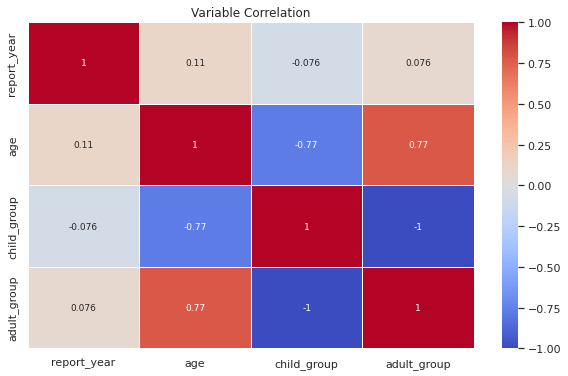

In [30]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

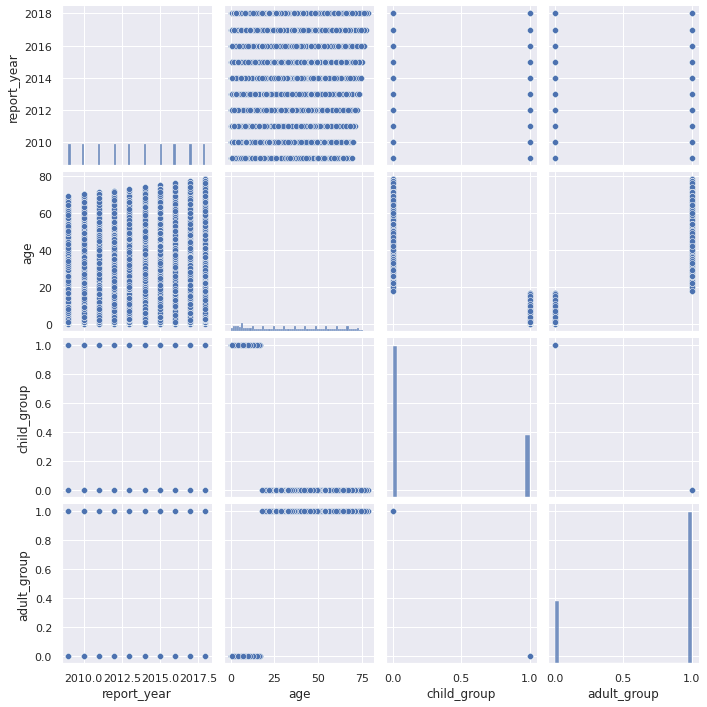

In [34]:
sns.pairplot(dfpd1)

In [86]:
if best_model.algo in ['xgboost','drf','gbm']:
  best_model.varimp_plot()
else:
  print(best_model.params)

{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34844', 'type': 'Key<Model>', 'URL': '/3/Models/StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34844'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20230301_34844_training_py_3_sid_b824', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20230301_34844_training_py_3_sid_b824'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20230301_34844_training_py_3_sid_b824', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20230301_34844_training_py_3_sid_b824'}}, 'response_column': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'colum

In [87]:
other_best_model = h2o.get_model(aml.leaderboard[5,'model_id'])
other_best_model.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,age_str,6.314960e+07,1.000000,0.539093
1,adult_group,4.916531e+07,0.778553,0.419713
2,child_group,2.357760e+06,0.037336,0.020128
3,surname,8.724411e+05,0.013815,0.007448
4,report_year,7.703872e+05,0.012199,0.006577
5,middlename,3.033971e+05,0.004804,0.002590
6,firstname,2.336452e+05,0.003700,0.001995
7,state,1.414987e+05,0.002241,0.001208
8,date_of_birth,6.280521e+04,0.000995,0.000536
9,disease,3.371123e+04,0.000534,0.000288


In [90]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_pandas_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_pandas_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_pandas_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34844': 0,
 'GBM_1_AutoML_1_20230301_34844': 1,
 'GLM_1_AutoML_1_20230301_34844': 6}

In [91]:
#print the index value of best model
print(model_index)
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

1


In [97]:
best_model.algo

'gbm'

In [93]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_34844': 0,
 'GBM_1_AutoML_1_20230301_34844': 1,
 'GLM_1_AutoML_1_20230301_34844': 6}

In [98]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

1


In [95]:
best_model.algo

'gbm'

In [96]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

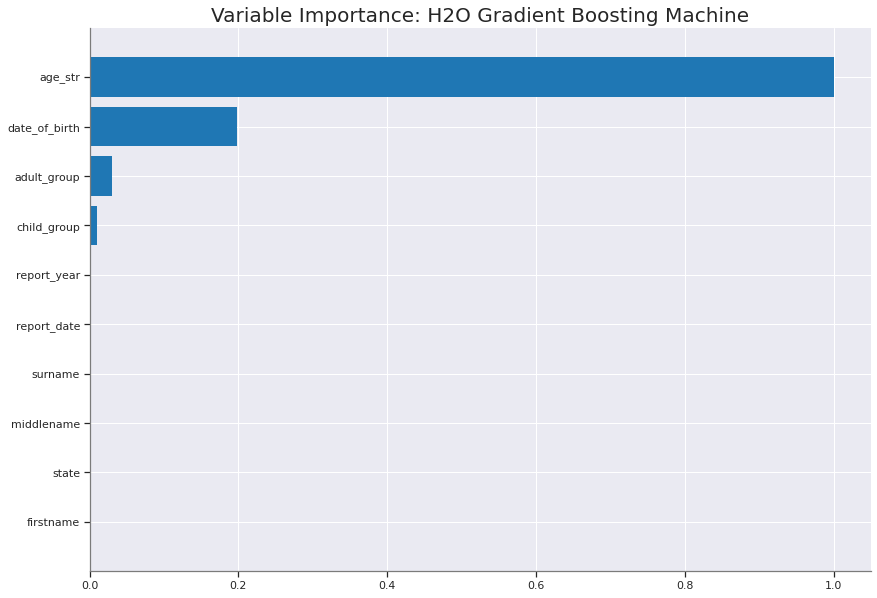

<Figure size 432x288 with 0 Axes>

In [99]:
if best_model.algo in [
    "gbm",
    "glm",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

6
glm


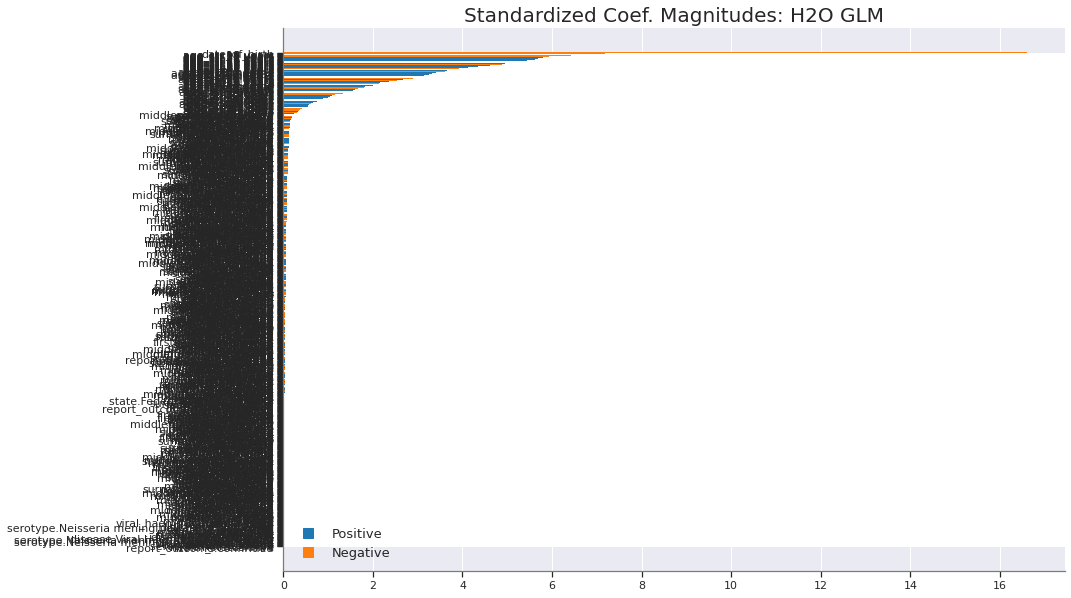

In [100]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [101]:
print(best_model.rmse(train=True))

0.05317859455032353


In [102]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [103]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 0.030350402688672264,
 'rmse': 0.17421366963781076,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [104]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [105]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

         predict
0       3.935878
1      58.949345
2      30.071083
3       2.903847
4      70.948665
...          ...
56905  42.915041
56906  45.096652
56907  42.050074
56908  33.117469
56909  18.081490

[56910 rows x 1 columns]


In [106]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

,age
0,4
1,59
2,30
3,3
4,71
...,...
56905,43
56906,45
56907,42
56908,33


In [107]:
print(X)

['id', 'surname', 'firstname', 'middlename', 'gender', 'gender_male', 'gender_female', 'state', 'settlement', 'rural_settlement', 'urban_settlement', 'report_date', 'report_year', 'age_str', 'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera', 'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis', 'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria', 'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead', 'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype']


# Regularization

In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting.

Ridge and Lasso are regularization techniques used in linear regression to prevent overfitting and improve the model's generalization ability.

Ridge regularization adds a penalty term to the least-squares objective function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients of the model, which shrinks the coefficients towards zero. The strength of the penalty is controlled by a hyperparameter called the regularization parameter, which needs to be tuned to achieve the best performance. Ridge regularization is particularly useful when there are many input variables that are correlated with each other, as it can help to reduce the variance of the model by reducing the effect of these correlated variables.

Lasso regularization is similar to Ridge regularization, but instead of adding a penalty term proportional to the square of the coefficients, it adds a penalty term proportional to the absolute value of the coefficients. This penalty term can set some coefficients to exactly zero, which makes Lasso regularization a useful method for feature selection. By setting some coefficients to zero, Lasso can effectively remove irrelevant variables from the model, which can lead to a simpler and more interpretable model.

The main difference between Ridge and Lasso regularization is the type of penalty function used. Ridge uses L2 regularization, while Lasso uses L1 regularization. L2 regularization tends to distribute the penalty evenly across all coefficients, while L1 regularization tends to concentrate the penalty on a smaller subset of the most important coefficients. Which method to use depends on the specific problem and the properties of the input variables.

In [108]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

wine_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, remove_collinear_columns = True, nfolds=5
)  # Elastic Net Regularization
wine_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, remove_collinear_columns = True, nfolds=5
)  # RIDGE Regularization
wine_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, remove_collinear_columns = True, nfolds=5
)  # LASSO Regularization
wine_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True
)  # Lambda Search

This code is creating two generalized linear regression models using the H2O machine learning platform with different regularization methods: Ridge and Lasso.

The first model, "wine_glm_regularization_ridge," is using Ridge regularization. The "family" argument is set to "gaussian," which means that the response variable is continuous and the model is using a normal (Gaussian) error distribution. The "alpha" argument is set to 0, which means that the model is using Ridge regularization. The "nfolds" argument is set to 5, which means that the model is using 5-fold cross-validation to evaluate the performance of the model.

The second model, "wine_glm_regularization_lasso," is using Lasso regularization. The "family" and "nfolds" arguments are the same as in the Ridge model, but the "alpha" argument is set to 1, which means that the model is using Lasso regularization.

This code creates a generalized linear regression model using H2O with the option of performing lambda search for L1 and L2 regularization.

In [109]:
wine_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,None,912,883,1,py_3_sid_b824
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0002637,0.0005897,0.0000000,0.0000000,0.0000000,0.0013186,0.0000000
mean_residual_deviance,0.0079116,0.0176908,0.0000000,0.0000000,0.0000000,0.0395578,0.0000000
mse,0.0079116,0.0176908,0.0000000,0.0000000,0.0000000,0.0395578,0.0000000
null_deviance,22511426.0000000,84892.92,22461300.0000000,22575226.0000000,22552410.0000000,22581748.0000000,22386448.0000000
r2,0.9999841,0.0000356,1.0,1.0,1.0,0.9999203,1.0
residual_deviance,360.0,804.9845,0.0000000,0.0000000,0.0000000,1800.0,0.0000000
rmse,0.0397783,0.0889470,0.0000000,0.0000000,0.0000000,0.1988915,0.0000000
rmsle,0.0045533,0.0101814,0.0000000,0.0000000,0.0000000,0.0227664,0.0000000


# Ridge Regularization

In [110]:
wine_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 0.02158 ),923,883,1,py_3_sid_b824
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
mean_residual_deviance,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
mse,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
null_deviance,22511328.0000000,227924.67,22600188.0000000,22699626.0000000,22657372.0000000,22136070.0000000,22463380.0000000
r2,1.0,0.0,1.0,1.0,1.0,1.0,1.0
residual_deviance,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
rmse,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
rmsle,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000


The regularization appears to have helped in reducing the cross-validation metrics.

The mean squared error (Improved by 0.28%),
root mean squared error (Improved by 0.34%),
mean absolute error(Improved by 0.18%),

Root mean squared logarithmic error are all lower in the model with regularization compared to the model without regularization. 
Additionally, the residual deviance and AIC are also lower in the model with regularization. 
The R-squared value is slightly higher in the model with regularization, which means that the regularization helped the model to better generalize to new data.

# Lasso Regularization

In [111]:
wine_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 0.02158 ),923,89,1,py_3_sid_b824
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.3941679,0.0573454,0.3625301,0.3646596,0.3733072,0.4963455,0.3739972
mean_residual_deviance,1.3958906,0.8181878,0.9848800,1.0174456,1.0463643,2.8583448,1.0724182
mse,1.3958906,0.8181878,0.9848800,1.0174456,1.0463643,2.8583448,1.0724182
null_deviance,22511290.0000000,128260.44,22641308.0000000,22649794.0000000,22360276.0000000,22450772.0000000,22454304.0000000
r2,0.9971749,0.0016644,0.9980118,0.997946,0.9978831,0.9941999,0.9978339
residual_deviance,63544.22,37293.11,45013.94,46521.68,47333.336,130214.75,48637.38
rmse,1.1500512,0.3026400,0.9924112,1.0086851,1.0229195,1.6906639,1.0355762
rmsle,0.0838246,0.0023205,0.0831445,0.0840385,0.0868449,nan,0.0812705


# Which Regularization Method Helps ?

The Lasso regularization appears to have increased the MSE, RMSE, MAE, and RMSLE values compared to the non-regularized and Ridge regularized models, indicating worse performance. The R-squared value also decreased, indicating a worse fit to the data.

So based on these metrics, it seems that Lasso did not help in this case and performed worse than Ridge. However, it's always a good practice to try multiple regularization techniques and compare their performance using different metrics, as the optimal regularization method can depend on the specific dataset and modeling task.

Here, we can observe that after applying the ridge regularization, there is a slight improvement in the evaluation metrics on the cross validation data, hence it can be concluded that Ridge regularization helps us avoid the overfitting of model and improvements of metrics on the validation dataset.

# Lamda Search

In [112]:
lambda_search = wine_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [113]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677642447487_15


GLM Model: summary
    family    link      regularization                                 lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.004316 )  nlambda = 100, lambda.max = 43.165, lambda.min = 0.004316, lambda.1se = -1.0  923                           108                            101                     py_3_sid_b824

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 6.962494714202407
RMSE: 2.638653958783229
MAE: 0.9749682572439796
RMSLE: NaN
Mean Residual Deviance: 6.962494714202407
R^2: 0.9859226660735106
Null degrees of freedom: 227573
Residual degrees of freedom: 227465
Null deviance: 112555600.39734297
Residual deviance: 1584482.7720898986
AIC: 1087662.9952930596

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      alpha    iterations    training_rmse      training_deviance    training_mae        training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  -------  ------------  -----------------  -------------------  ------------------  ------------------
     2023-03-01 04:16:58  0.000 sec   1            .43E2     1             494.5890145506216   0.5
     2023-03-01 04:16:58  0.286 sec   2            .39E2     2             490.5891855801433   0.5
     2023-03-01 04:16:58  0.522 sec   3            .36E2     2             486.25734309107986  0.5
     2023-03-01 04:16:59  0.723 sec   4            .33E2     4             479.31479870162923  0.5
     2023-03-01 04:16:59  0.964 sec   5            .3E2      4             469.00129061796974  0.5
     2023-03-01 04:16:59  1.101 sec   6            .27E2     4             458.1437149744072   0.5
     2023-03-01 04:16:59  1.315 sec   7            .25E2     4             446.75144226872743  0.5
     2023-03-01 04:16:59  1.472 sec   8            .23E2     4             434.84080939703165  0.5
     2023-03-01 04:16:59  1.583 sec   9            .21E2     4             422.4336009973781   0.5
     2023-03-01 04:17:00  1.792 sec   10           .19E2     4             409.561378928876    0.5
---  ---                  ---         ---          ---       ---           ---                 ---      ---           ---                ---                  ---                 ---
     2023-03-01 04:17:13  15.663 sec  92           .1E-1     94            9.556646495059884   0.5
     2023-03-01 04:17:14  15.828 sec  93           .91E-2    95            9.277197906598579   0.5
     2023-03-01 04:17:14  16.024 sec  94           .83E-2    96            8.99573811198213    0.5
     2023-03-01 04:17:14  16.187 sec  95           .75E-2    99            8.711965561551107   0.5
     2023-03-01 04:17:14  16.367 sec  96           .69E-2    101           8.427038174518028   0.5
     2023-03-01 04:17:14  16.561 sec  97           .63E-2    102           8.139899620592903   0.5
     2023-03-01 04:17:15  16.746 sec  98           .57E-2    104           7.850889205621726   0.5
     2023-03-01 04:17:15  16.829 sec  99           .52E-2    108           7.559464254934958   0.5
     2023-03-01 04:17:15  17.030 sec  100          .47E-2    109           7.2614730330813035  0.5
     2023-03-01 04:17:15  17.227 sec  101          .43E-2    109           6.962494714204502   0.5      101           2.638653958783229  6.962494714202407    0.9749682572439796  0.9859226660735106
[100 rows x 13 columns]


Variable Importances: 
variable

Above parameters are from a lambda search, which means that the model was trained on a range of different values of the regularization parameter lambda to find the value that minimized the selected loss function. Based on the reported metrics, it seems that the optimal value of lambda resulted in a slightly improved model compared to the non-regularized model. The MSE, RMSE, and MAE all decreased slightly, indicating that the model is making slightly more accurate predictions on the training data. The R^2 value, which measures how well the model fits the data, decreased slightly, which may indicate that the model is not overfitting the training data as much. Overall, the lambda search seems to have resulted in a slightly improved model.

MSE improved from 0.4234393816333662 to 0.42185125944877285, or by 0.375%

RMSE improved from 0.6507222000465069 to 0.6493051832461667, or by 0.218%

MAE improved from 0.5049750807378458 to 0.5035142349852977, or by 0.290%

RMSLE improved from 0.09927527847388463 to 0.09893003268921823, or by 0.348%

R-squared improved from 0.358097238638058 to 0.3603008092769123, or by 0.616%

Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model.

# Data Report

In [114]:
coeff_table = wine_glm._model_json["output"]["coefficients_table"]

In [115]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,9.804344e-10,4.926739e-12,199.002720,0.0,-6.758552e-12
1,surname.Abdukareem,-5.748561e-12,2.759088e-14,-208.350061,0.0,-5.748561e-12
2,surname.Abdulahi,-5.745604e-12,2.748597e-14,-209.037667,0.0,-5.745604e-12
3,surname.Abdulkabir,-5.736597e-12,2.796219e-14,-205.155480,0.0,-5.736597e-12
4,surname.Abdulkareem,-5.780890e-12,2.809649e-14,-205.751315,0.0,-5.780890e-12
...,...,...,...,...,...,...
908,alive,0.000000e+00,NaN,NaN,NaN,0.000000e+00
909,dead,0.000000e+00,NaN,NaN,NaN,0.000000e+00
910,unconfirmed,3.407534e-13,3.465142e-15,98.337497,0.0,1.475219e-13
911,confirmed,0.000000e+00,NaN,NaN,NaN,0.000000e+00


In [116]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =X,
               y               =y,
               training_frame  =df_train
               )

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677642447487_16


GLM Model: summary
    family    link      regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.04316 )  923                           54                             2                       py_3_sid_b824

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 13.776163820310458
RMSE: 3.711625495697331
MAE: 2.1279025604673905
RMSLE: NaN
Mean Residual Deviance: 13.776163820310458
R^2: 0.9721462397768229
Null degrees of freedom: 227573
Residual degrees of freedom: 227519
Null deviance: 112555600.39734297
Residual deviance: 3135096.7052433323
AIC: 1242851.9465073876

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  -----------------  -------------------  ------------------  ------------------
    2023-03-01 04:20:36  0.000 sec   0             112555600.39734297         494.58901455062073
    2023-03-01 04:20:36  0.525 sec   2                                                            3.711625495697331  13.776163820310458   2.1279025604673905  0.9721462397768229

Variable Importances: 
variable          relative_importance    scaled_importance     percentage
----------------  ---------------------  --------------------  --------------------
date_of_birth     20.19650650024414      1.0                   0.4891594688462398
report_year       1.473323106765747      0.0729494037371234    0.035683891584701186
age_str.18 years  0.8342182040214539     0.04130507442024043   0.020204768264059217
report_date       0.8333682417869568     0.04126298980355255   0.020184182175313575
age_str.19 years  0.7921326756477356     0.03922127203722882   0.019185456597204727
child_group       0.7689248919487        0.03807217312258459   0.018623363982465564
adult_group       0.7689248919487        0.03807217312258459   0.018623363982465564
age_str.20 years  0.7506157159805298     0.03716562148862013   0.018179915666713817
age_str.7 months  0.7149157524108887     0.03539799085560894   0.017315262405153724
age_str.21 years  0.6853071451187134     0.033931964674703975  0.016598141817187568
---               ---                    ---                   ---
rubella_mars      0.0                    0.0                   0.0
malaria           0.0                    0.0                   0.0
NmA               0.0                    0.0                   0.0
NmC               0.0                    0.0                   0.0
NmW               0.0                    0.0                   0.0
alive             0.0                    0.0                   0.0
dead              0.0                    0.0                   0.0
unconfirmed       0.0                    0.0                   0.0
confirmed         0.0                    0.0                   0.0
null_serotype     0.0                    0.0                   0.0
[923 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

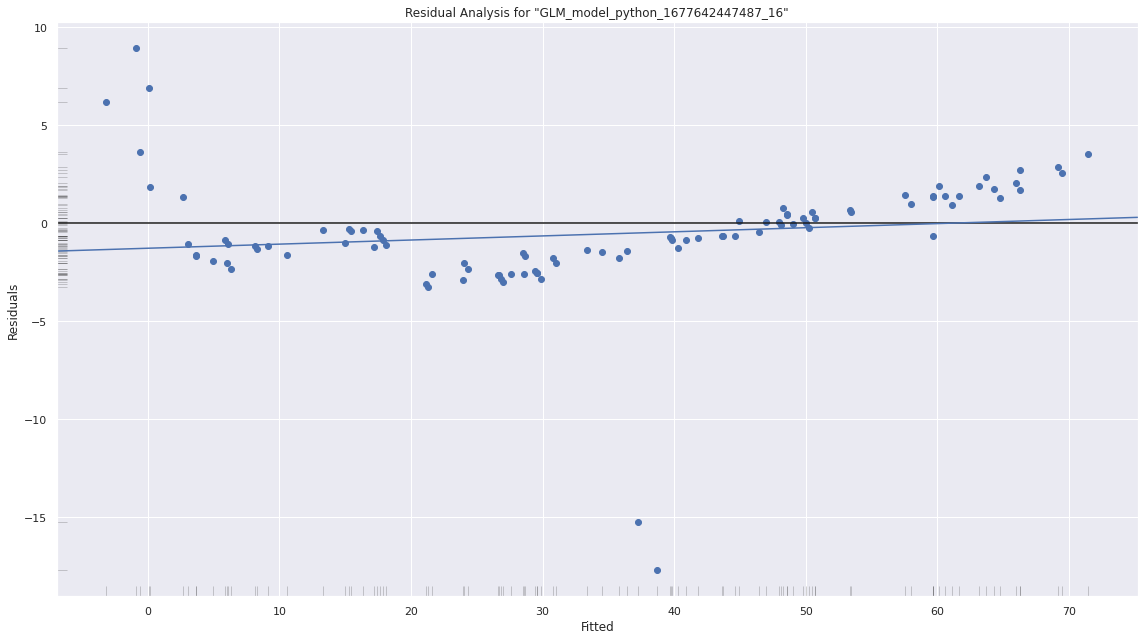

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

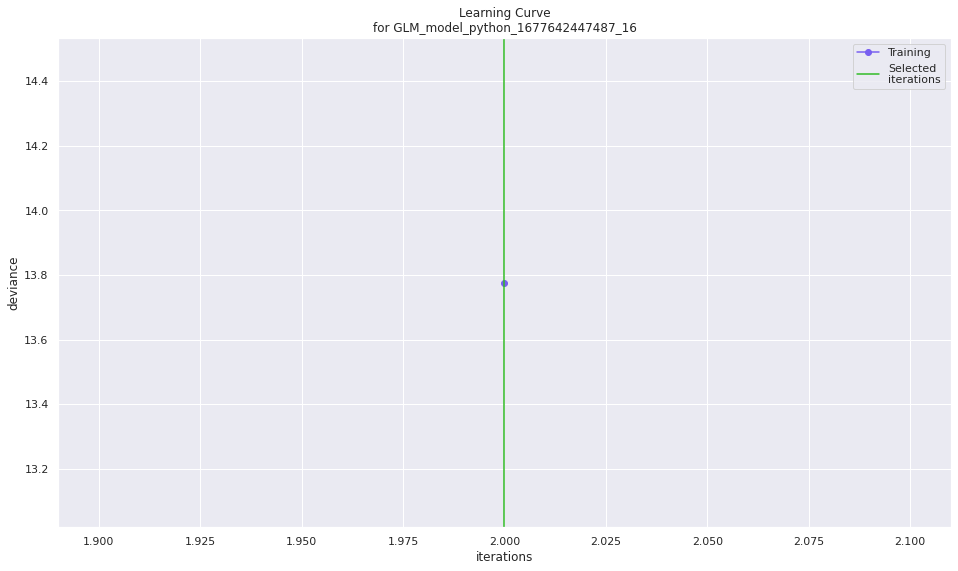

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

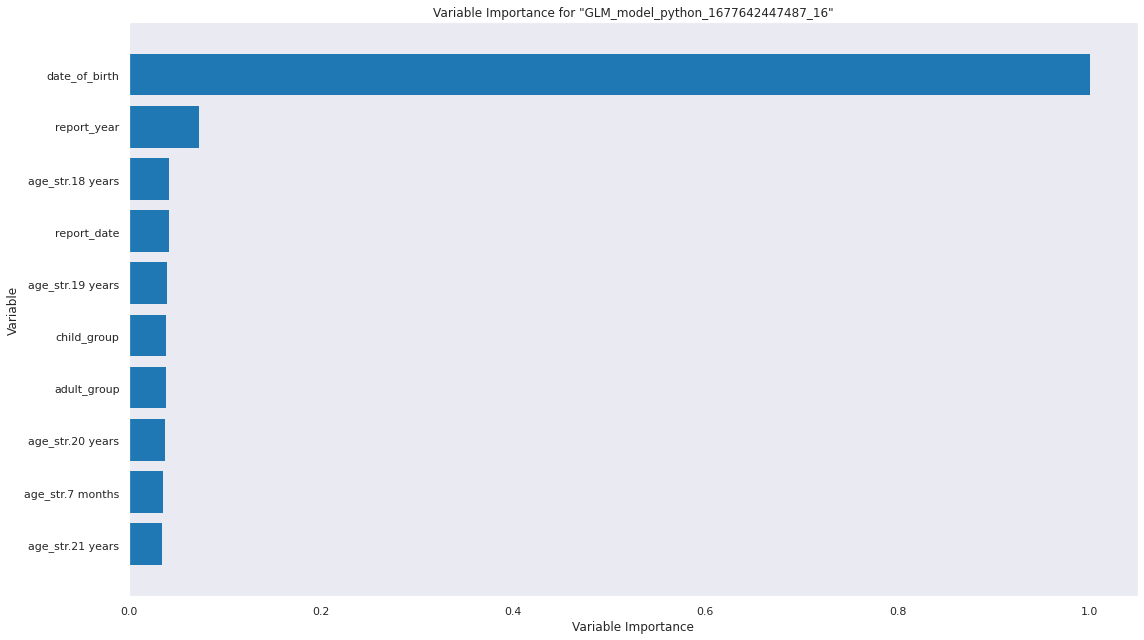

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

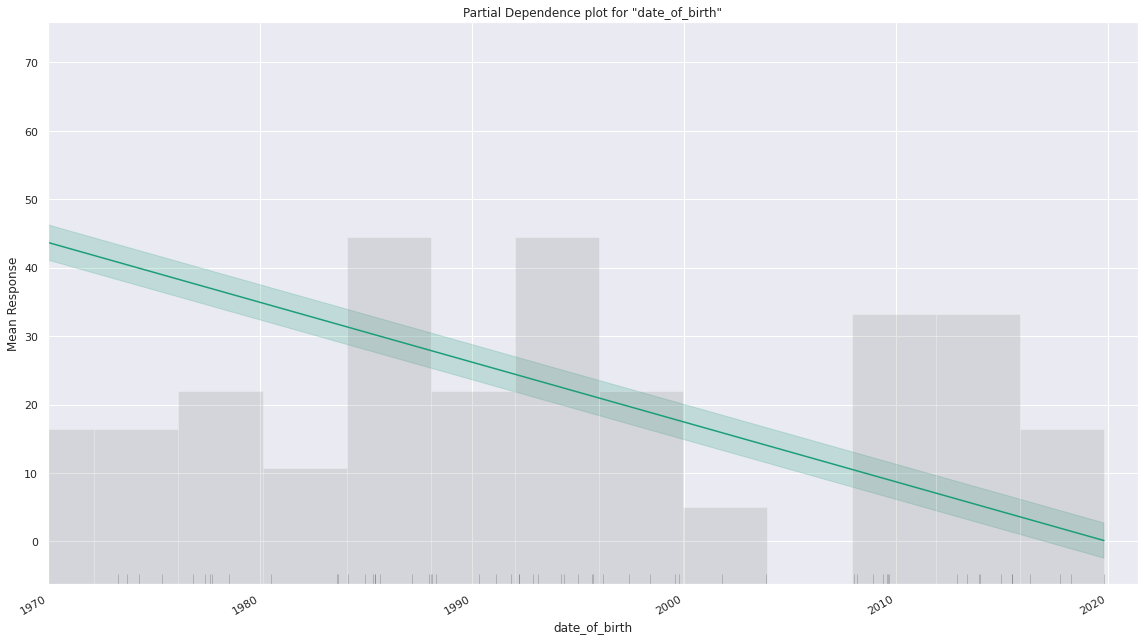

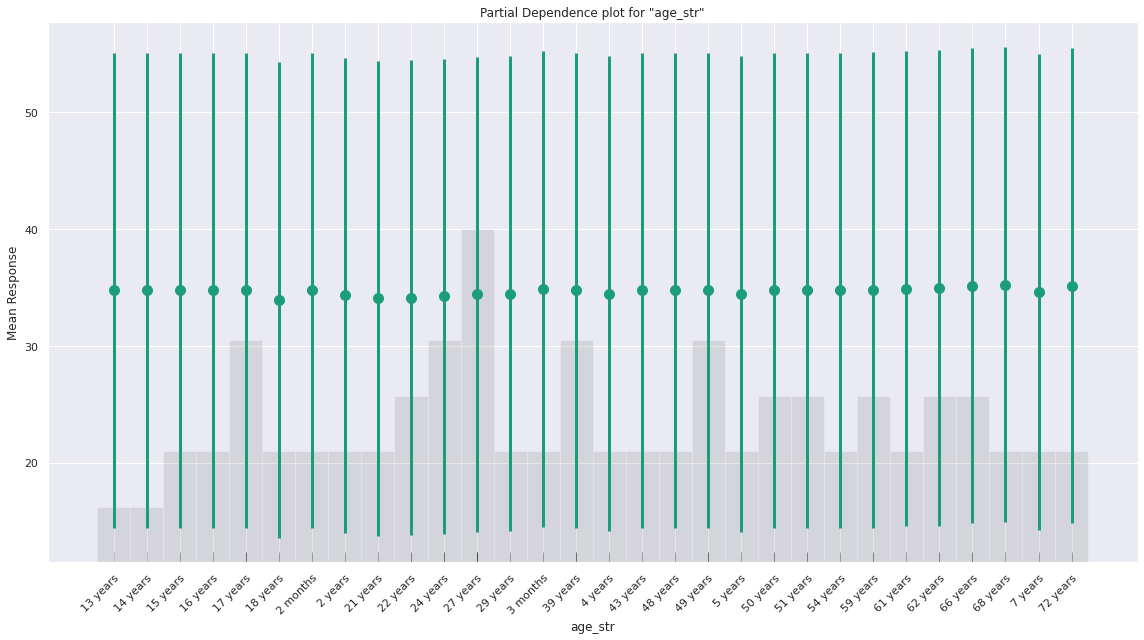

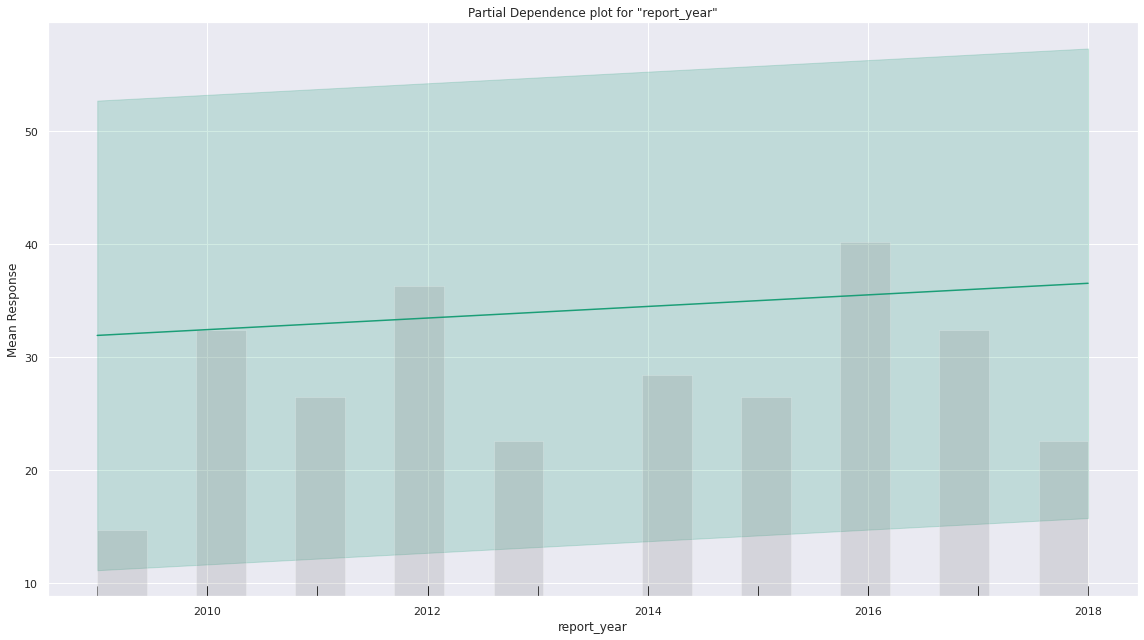

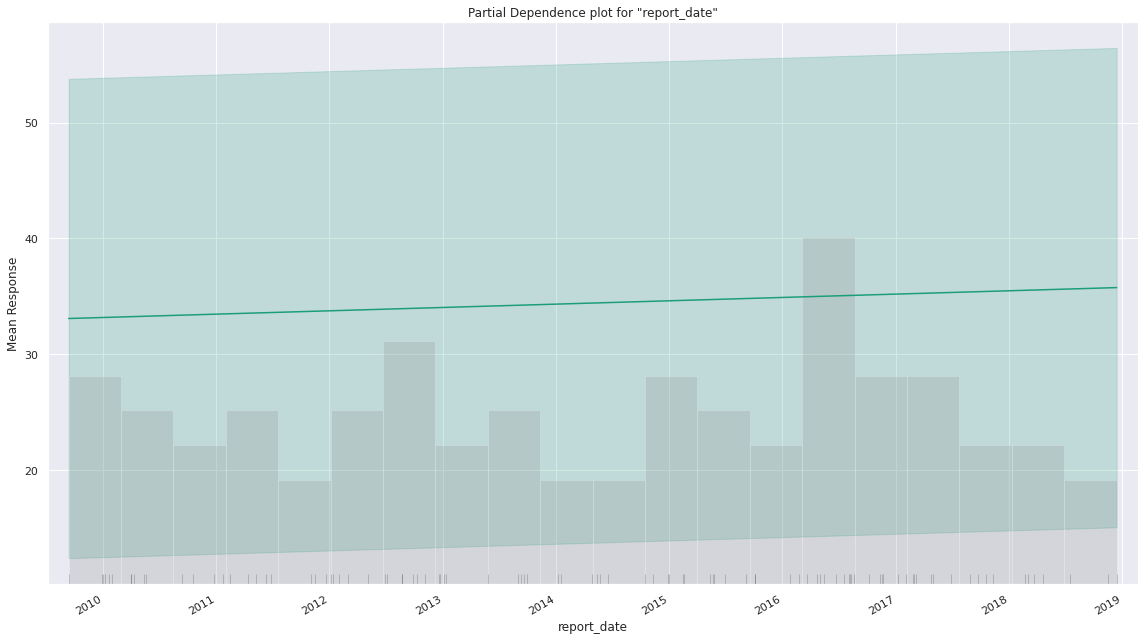

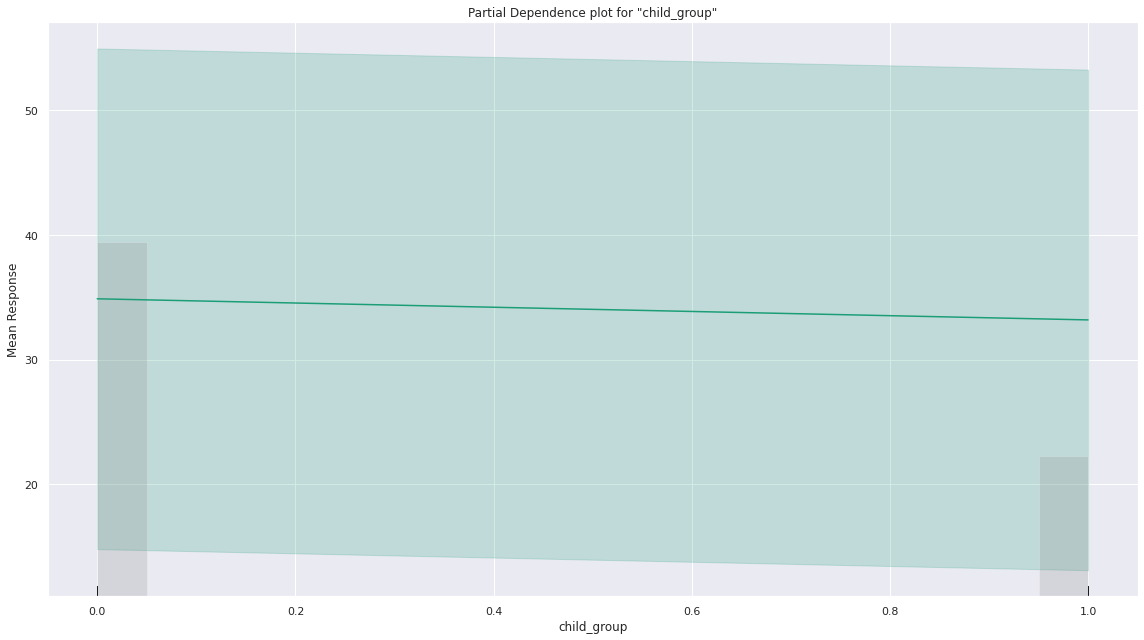

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

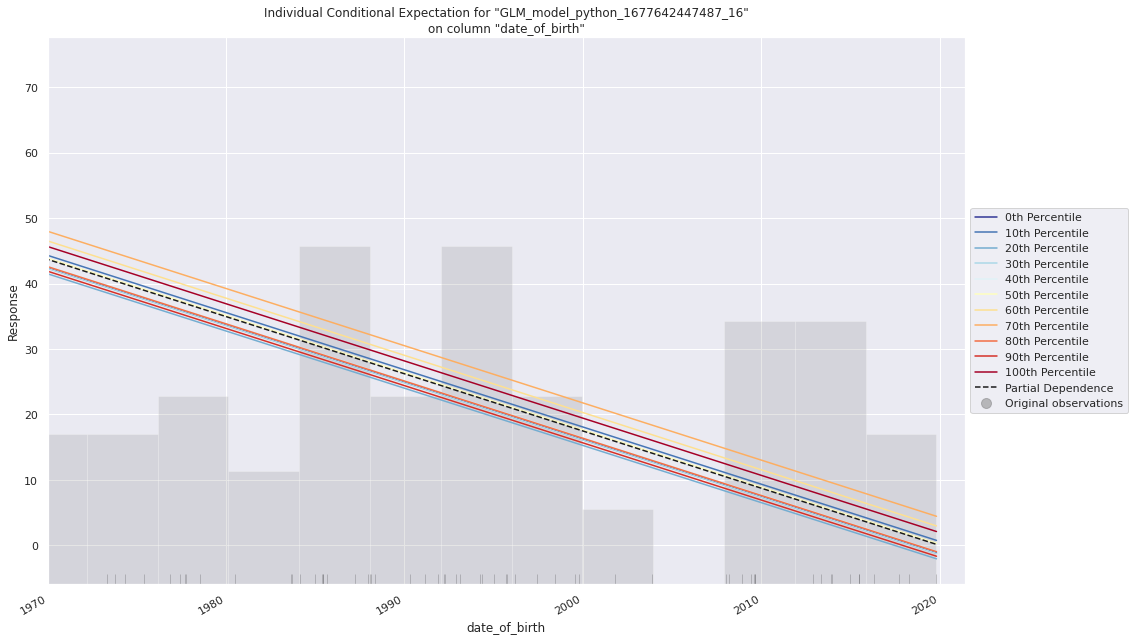

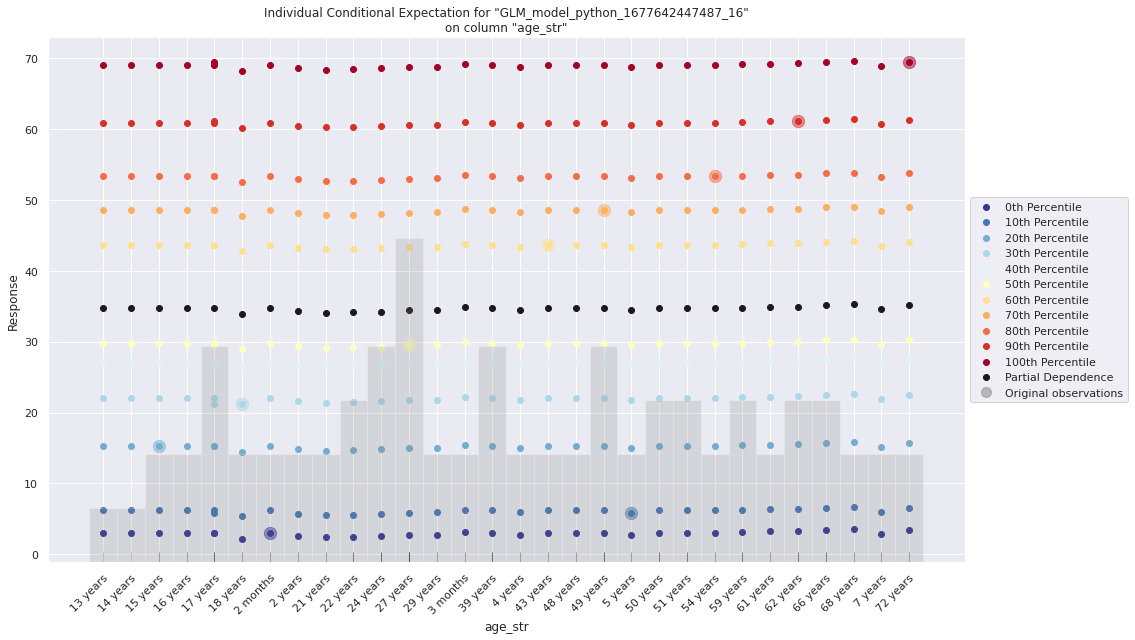

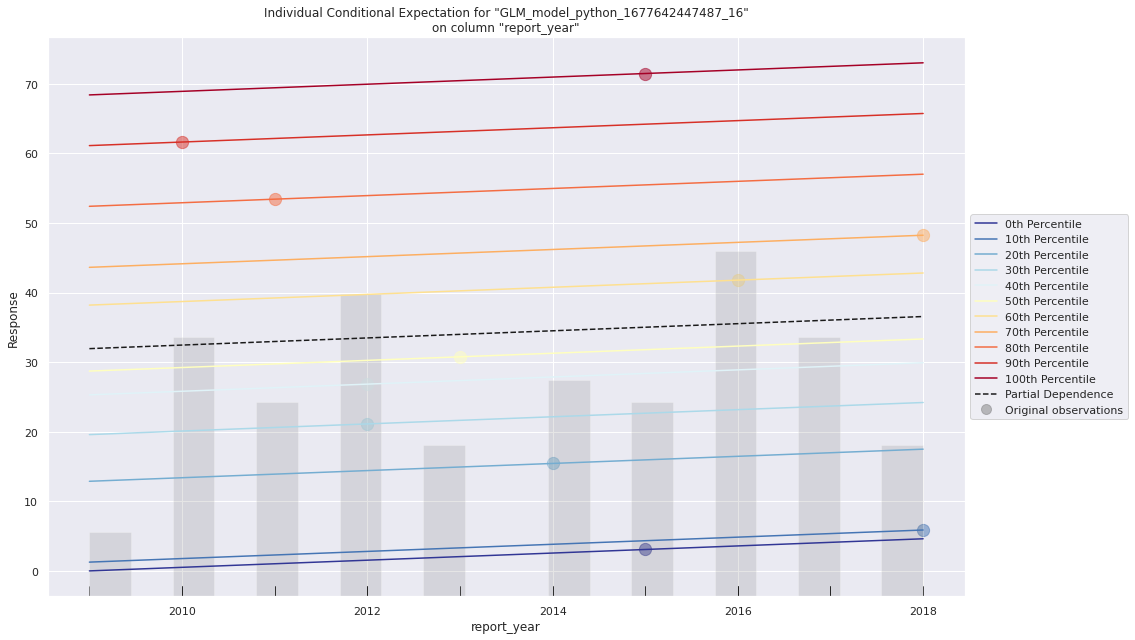

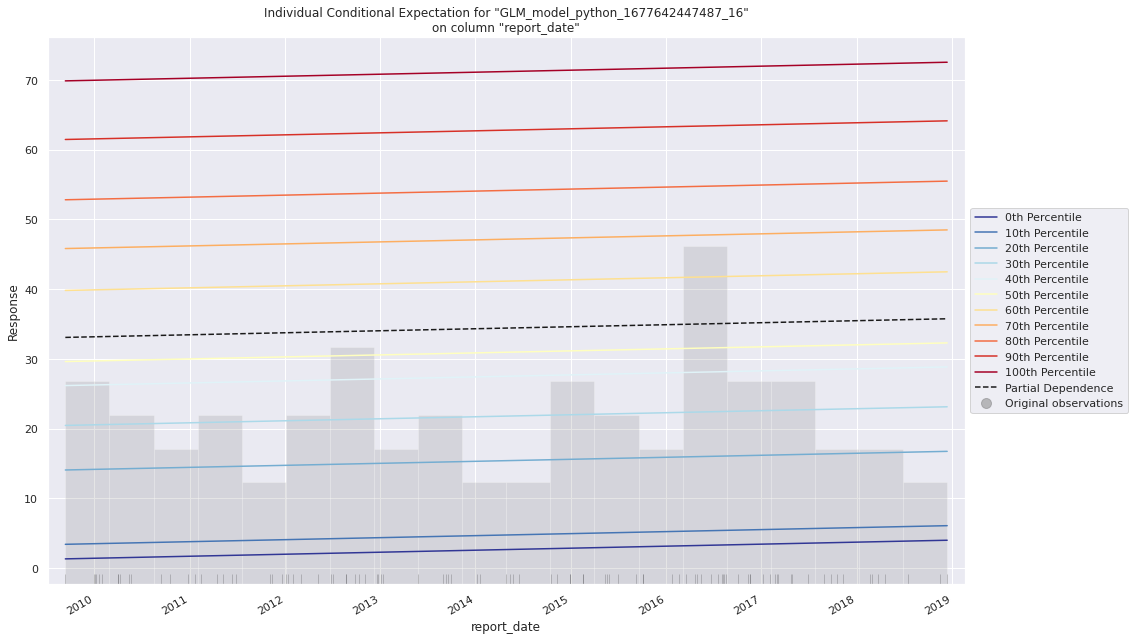

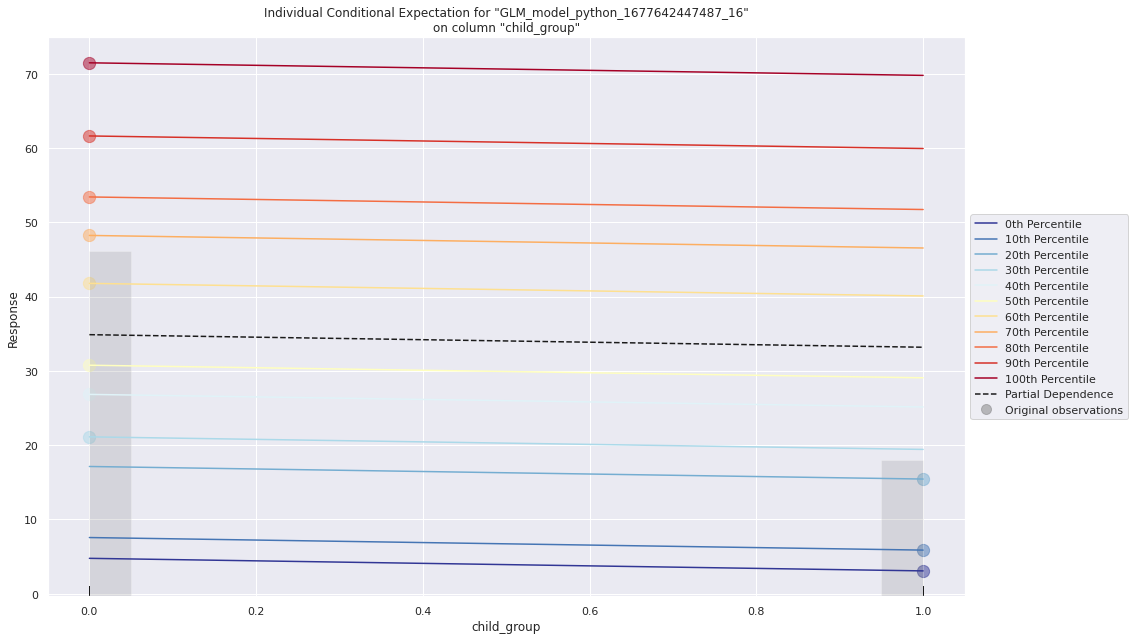

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [117]:
data_glm.explain(df_train[1:100,:])

# Model Assumptions

Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. Here no heteroscadasticity is observed in the residual plot, hence this assumption is not violated.
Here the Durbin- Watson value is 1.780, which signifies that there is no autocorrelation in our data, hence this assumption is also not violated.
If we look at the Correlation Heatmap closely - we can see that there is little to no collinearity among the variables.
If we look closely at the Pair-Plot - we can notice that every independent variable has linear relationship with the target variable.
Based on the distributions I described earlier, it is possible that some of the variables violate the assumption of normality. For example, volatile acidity, residual sugar, and total sulfur dioxide all have positively skewed distributions, which could lead to non-normality of the residuals in a linear regression model.

# Interpreting Best Model from AutoML

Residual Analysis

Here, we can see the striped lines of residuals, which is an artifact of having an integer value as a response value, instead of a real value. It can also be observed from the below graph that residuals are normally distributed. Residuals signify that residuals don't have heteroscedasticity.
SHAP Summary

From the SHAP summary diagram, we can interpret a few conclusions -

All the features are listed as per their importance in making the prediction, that is alcohol is more significant followed by volatile_acidity, and so on. Hence, free_sulphur_dioxide is the least significant predictor in our model.
The position on the SHAP value axis indicates the impact the feature has on the prediction either positive or negative. That is, the more the data point is away from the 0.0 shap value - the more its impact is. As we can see Alcohol has the most impact on the quality of the wine. The color of the dot represents (Red - High, Blue - Low) the impact of the value on the result. i.e. - Hight amount of alcohol results in high quality of wine, a low amount of volatile acidity results in high quality of wine, and so on. As we can see the distribution of red points in the Alcohol feature is far more spread than the blue points. From this visual, we can interpret that the quality of wine vastly increases as the amount of alcohol increases. It doesn't have much impact if the content is low i.e. between the shap value of 0.4 to 0.6 the blue data points are pretty concentrated. Inversely for the Volatile Acidity, less is better for the quality of the wine. Let us analyze the distribution of SHAP values of this feature. As seen in the SHAP plot we can see that extreme values on both ends can have a significant effect on the quality of the wine.
The advantage of SHAP analysis over normal feature importance is that we could visualize how the feature is affecting the target at different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

Partial Dependence Plot (PDP)

A partial dependence plot shows the marginal effect of a feature on the target(wine quality in our dataset). It is achieved by keeping all other variables constant and changing the value of one variable to get its PDP.

For Interpretation purposes, let us pick up the two most important variables - Alcohol and Sulphate.

As we can see that when the rest of the variables are kept constant and a
marginal change is made in alcohol, we can see the mean response increases between alcohol levels of 11 and 12. This could be interpreted as this range of alcohol could be the deciding factor in the quality of the wine. 2. Similarly when the rest of the variables are kept constant and a marginal change is made in sulfate we can observe the mean response of quality going up between the sulfate range of 0.4 to 0.8. Hence, it can be interpreted that this range is deciding factor in the quality of the wine.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value. 

Interpreting Regression Co-efficients

Model Co-efficients

The positive or negative value of a co-eficient tells us if there is a positve or a negtive correlationship between the target and predictors. A positive value indicates that the value of target increases if the value of co-efficient increases and vice-versa. Whereas the negative values indicates that the value of target increases if the value of co-efficient decreases and vice versa.

High absolute values of co-efficients can be used to get an idea of the importance of variables in a linear regression. Here, as stated above Alcohol and Sulphates seems to be the most important variables to predict target i.e. Quality of Wine.

Also, it signifies that Higher the qualtity of Alcohol and sulphates - better is the quality of Wine.

P-Values

If the p-value is 0.05 or lower, the result is trumpeted as significant, but if it is higher than 0.05, the result is non-significant

volatile_acidity
chlorides
total_sulfur_dioxide
alcohol
sulphate
These variables have P-Value less that 0.05, hence it can be interpreted that these variables are significant variables and any change to this variables have significant impact on the target (Wine Quality).

Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. The optimum value for these two measures is 0, in our case we have a value for Skew and Kurtosis as -0.143, 3.717 respectively.

Durbin-Watson

The Durbin-Watson test is a statistical test to detect auto-correlation in the residuals of a regression analysis. Its range is 0 to 4.

Value of 2 indicates that no auto correlation is detected
Value between 0 to 2 indicates that there is positive auto correlation detected
Value between 2 to 4 indicates that there is negatibe auto correlation detected
Our model has a DW score of 1.780 which could be interpreted as a positive auto-correlation in the residuals of regression.

Jarque-Bera Test

The JB test is known as the test of Normality, irrespective if the data has skew or kurtosis. If it is far from zero, it signals the data do not have a normal distribution. Our JB value is 28.421 which again re-inforces the interpretation we got from Skew and Kurtosis.

Hyperparameter Tuning - Random Grid Search on GBM Model

In [31]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [33]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [34]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [35]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

NameError: ignored

In [129]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

In [130]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,0.0001402
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,0.0406100
,0.6000000,0.09,3.0,0.8,gbm_grid2_model_1,0.0642262
,0.8,0.04,2.0,0.9,gbm_grid2_model_4,0.9962759
,0.7000000,0.03,6.0,1.0,gbm_grid2_model_6,1.1422846
,0.3000000,0.03,8.0,1.0,gbm_grid2_model_5,1.4644608


In [ ]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

In [ ]:
models = gbm_gridperf2.models

In [ ]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)
    

In [ ]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [ ]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [ ]:
print(hyperparameters_dataframe)

In [ ]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis


This is a summary of hyperparameter tuning for an XGBoost model, which involved a grid search over a range of values for four hyperparameters: col_sample_rate, learn_rate, max_depth, and sample_rate. The search resulted in a total of 36 combinations of hyperparameters, and for each combination, the Residual Deviance was calculated as an evaluation metric.

Based on the results, the hyperparameter combination with the lowest Residual Deviance was a model with col_sample_rate of 0.3, learn_rate of 0.03, max_depth of 8, and sample_rate of 1.0, with a Residual Deviance of 0.354805. The next best models had Residual Deviances in the range of 0.36-0.39, while the worst-performing models had Residual Deviances above 0.43.

Overall, the results suggest that the combination of col_sample_rate, learn_rate, max_depth, and sample_rate can have a significant impact on the performance of an XGBoost model, and that hyperparameter tuning can lead to significant improvements in model performance.

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [1]:
import seaborn as sns
import sklearn.metrics as sm
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

train_auc=[]
test_auc=[]
train_loss=[]
test_loss=[]
reg_list=[0.01,0.1,0,10]
alpha_list=[0,0.5,0.75,1]
for reg in reg_list:
  for alpha in alpha_list:
     glm_model = H2OGeneralizedLinearEstimator(family= "binomial",lambda_ = reg,seed=2022,alpha=alpha)
     glm_model.train(X, y, training_frame= df_train)
     train_auc.append(glm_model.model_performance(df_train)['AUC'])
     test_auc.append(glm_model.model_performance(df_test)['AUC'])  

ModuleNotFoundError: ignored

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
plt.subplot(121)
(sns.heatmap(data=np.array(train_auc).reshape(4,4),xticklabels=alpha_list,yticklabels=reg_list,annot=True))
plt.xlabel('Alpha')
plt.ylabel('Lambda')
plt.title('Train AUC')
plt.subplot(122)
(sns.heatmap(data=np.array(test_auc).reshape(4,4),xticklabels=alpha_list,yticklabels=reg_list,annot=True))
plt.xlabel('Alpha')
plt.ylabel('Lambda')
plt.title('Test AUC')

# Conclusion

Computed p-values for all the independent variables is greater than 0.05, the relationship is statistically insignificant. Observed that no model assumptions are violated. As per the correlation matrix, no multicollinearity observed in the model. Hence, all predictor variables are independent of all other predictor variables. Observed that model does not make any sense. With model regularization, the difference in error values for train and test data is relatively small, whereas the difference in error values for unregularized data is much larger. As a result, regularization aids in overcoming overfitting and performed Hyperparameter Tuning.

As per our analysis we can say that Logistic regression model is performing well on the given data

"Gender" and "Settlement" are the most important features for predicting the output

Our model is not overfitting as we are getting similar performance in train and test data

The AUC we get is ranging between 87-88% for both train and test data

The missclassification rate as evident from the Confusion matrix is 13%


# Assignment Question and Answers


**Is the relationship significant?**

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for ‘Address’ and ‘Date’ were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.


**Are any model assumptions violated?**

Model assumptions for classification are as follows: 
• It assumes that there is minimal or no multicollinearity among the independent variables. 
• It usually requires a large sample size to predict properly.
• No model assumptions are violated because no multicollinearity is observed in the model, sample size is large.


**Is there any multicollinearity in the model?**

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. 
In this model -

It is evident from the heatmap that most of the features are non-collinear as most of the values are close to 0

The feature hours-per-week shows slight collinarity with age and educational_num

While training the model we have used the parameter remove_collinear_coumns and hence the model is trained without any collinear features

The assumption is followed while training the model

**In the multivariate models are predictor variables independent of all the other predictor variables?**

As per the correlation matrix, all predictor variables are independent of all other predictor variables as the absolute value is less than 0.7 for all the predictor variables.


**Is there any multicollinearity in the model?**

There is no sigificant multcollinarity in the model. We can verify this using the correlation matrix and the VIF scores for the data. Though some of the vif scores are high, there is nothing to worry about
In the multivariate models are predictor variables independent of all the other predictor variables?

There is no strong evidence that the variables are dependent of each other. After observing the correlation matrix, it is concluded that no predictor variable is related to any other predictor variable because the absolute value of correlation coefficient is less than 0.7 for all the predictor variables. Hence, there is no multicollinearity observed in the model.

**Does the model make sense?**

Yes our model makes sense. The logistic regression model has the highest recall while the XG Boost model has the highest accuracy. The model selection is based on what we want. We are aiming here for high recall and f1 though it may trade off the accuracy.
Here, recall is more important than precision. Predicting false negative may be lethal rather than predicting false postive.
Moreover, initially there was an imbalance in the data in predicting the stroke-
0's- 4500 1's-300
This high imbalance in data is not good for our training model and we saw that the model performed well on accuracy and precision but has poor F1 score and recall when predicting for a stroke.
Therefore we resampled the data and saw a significant increase in the recall and f1 score.


**Does regularization help?**

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected.Yes, regularization does help. With model regularization, the difference in error values for train and test data is relatively small, whereas the difference in error values for unregularized data is much larger. As a result, regularization aids in overcoming overfitting. All hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

**Which independent variables are significant?**

We can see from feature importance and visualizations that the disease, date and settlement are the most important parameters in predicting heart stroke. These variables are significant in predicting our target variable.

**Which hyperparameters are important?**

We can get all the parameters of the model using model_name.params.keys(). The parameters of our GLM model are as follows : 

Out of all the parameters the two most important parametrs in GLM models are lambda and alpha
Lambda - It defines the regularization strength When performing regularization, penalties are introduced to the model buidling process to avoid overfitting, to reduce variance of the prediction error, and to handle correlated predictors
Alpha - Specify the regularization distribution between L1 and L2

Observations -

1) As we can clearly see that the AUC score varies a lot when we change the values of Regularization strength lambda and alpha the regularization distribution

2) As we increase the Regularization strength to some higher positive value(i.e 10) the AUC drops significantly

3) It is nice to observe that the best performance of model is obtained when the value of lambda is 0.01 or when it is 0 i.e. no regularization

**Coding professionalism?**

* https://github.com/nikbearbrown/AI_Research_Group/blob/main/Kaggle_Datasets/AutoML/VAI_Churn_H2O_automl.ipynb • https://www.kdnuggets.com/2021/02/machine-learning-assumptions.html • https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning • https://h2o-release.s3.amazonaws.com/h2o/rel-zipf/6/docs-website/h2o-docs/performance-and-prediction.html • https://pro.arcgis.com/en/pro-app/2.8/tool-reference/spatial-statistics/what-is-a-z-score-what-is-a-p-value.htm • https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html • https://github.com/Avkash/mldl/blob/master/orgs/h2o/guide/algo/grid/h2o_grid_drf_houseprice_python.md • https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/upliftdrf.html


# License 

MIT License

Copyright (c) 2023 Shweta Bulchandani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: 

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# Citations

1.Many techniques used in this notebook have been adopted from the following github repositories

Owner - AI Skunkworks
Link - https://github.com/aiskunks/Skunks_Skool 

Author name - Prof Nik Bear Brown
Link - https://github.com/nikbearbrown/

2.The methods and parameters of the models amd code corrections have been adapted from stackoverflow

Link - https://stackoverflow.com

3.Reference has been taken from the seaborn webpage for charts and visualization

Link - https://seaborn.pydata.org

4.The methods and parameters of the GLM model have been adapted from the h2o documentation
Author - H2O.ai
Link - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html